# Monocular, One-stage, Regression of Multiple 3D People

Demo of the original PyTorch based implementation provided here: https://github.com/Arthur151/ROMP

## Note
Before running this notebook make sure that your runtime type is 'Python 3 with GPU acceleration'. Go to Edit > Notebook settings > Hardware Accelerator > Select "GPU".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/TFM_ROMP
!git clone -b master --single-branch https://github.com/Arthur151/ROMP
!wget https://github.com/Arthur151/ROMP/releases/download/v1.0/ROMP_data.zip
!sudo apt-get install unzip
!unzip ROMP_data.zip -d /content/
!dir

In [ ]:
%cd /content/drive/MyDrive/TFM_ROMP/ROMP/
!git pull

/content/drive/MyDrive/TFM_ROMP/ROMP
Already up to date.


In [ ]:
%cd /content/drive/MyDrive/TFM_ROMP/ROMP/src
!dir
!pip install -r requirements.txt
!pip install -U PyYAML numpy
!pip install pyrender==0.1.43
!apt-get install libc++-7-dev
!pip install addict smplx loguru

/content/drive/MyDrive/TFM_ROMP/ROMP/src
configs  core  _init_paths.py  lib  requirements.txt  run.sh
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 194kB 24.4MB/s 
     |████████████████████████████████| 300.6MB 56kB/s 
     |████████████████████████████████| 11.8MB 32.2MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 9.3MB 158kB/s 
     |████████████████████████████████| 8.2MB 28.8MB/s 
     |████████████████████████████████| 1.0MB 26.3MB/s 
     |████████████████████████████████| 103.4MB 29kB/s 
     |████████████████████████████████| 389kB 42.7MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 430kB 41.7MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel 

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.7/dist-packages (5.4.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.3)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libc++-7-dev is already the newest version (1:7-3~ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


### Run the demo code.

Check https://github.com/Arthur151/ROMP/blob/master/src/config_guide.md for more details about configurations.

**Note:** Final rendering is slow compared to inference. We use pyrender with GPU accelaration. Please let us know if you know any faster alternative. 

In [ ]:
%cd /content/drive/MyDrive/TFM_ROMP/ROMP/src
!CUDA_VISIBLE_DEVICES=0 python core/test.py --gpu=0 --configs_yml=configs/single_image.yml

/content/drive/MyDrive/TFM_ROMP/ROMP/src
pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO - 2021-06-10 09:58:30,796 - acceleratesupport - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
INFO - 2021-06-10 09:58:31,479 - base - {'tab': 'hrnet_cm64_single_image_test', 'configs_yml': 'configs/single_image.yml', 'demo_image_folder': '/content/drive/MyDrive/TFM/10_Ayagaures', 'local_rank': 0, 'model_version': 1, 'multi_person': True, 'collision_aware_centermap': False, 'collision_factor': 0.2, 'kp3d_format': 'smpl24', 'eval': False, 'max_person': 64, 'input_size': 512, 'Rot_type': '6D', 'rot_dim': 6, 'centermap_conf_thresh': 0.25, 'centermap_size': 64, 'deconv_num': 0, 'model_precision': 'fp32', 'backbone': 'hrnet', 'gmodel_path': '../trained_models/ROMP_hrnet32.pkl', 'print_freq': 50, 'fine_tune': True, 'gpu': '0', 'batch_size': 64, 'val_batch_size': 1, 'nw': 4, 'calc_PVE_error': False, 'dataset_roo

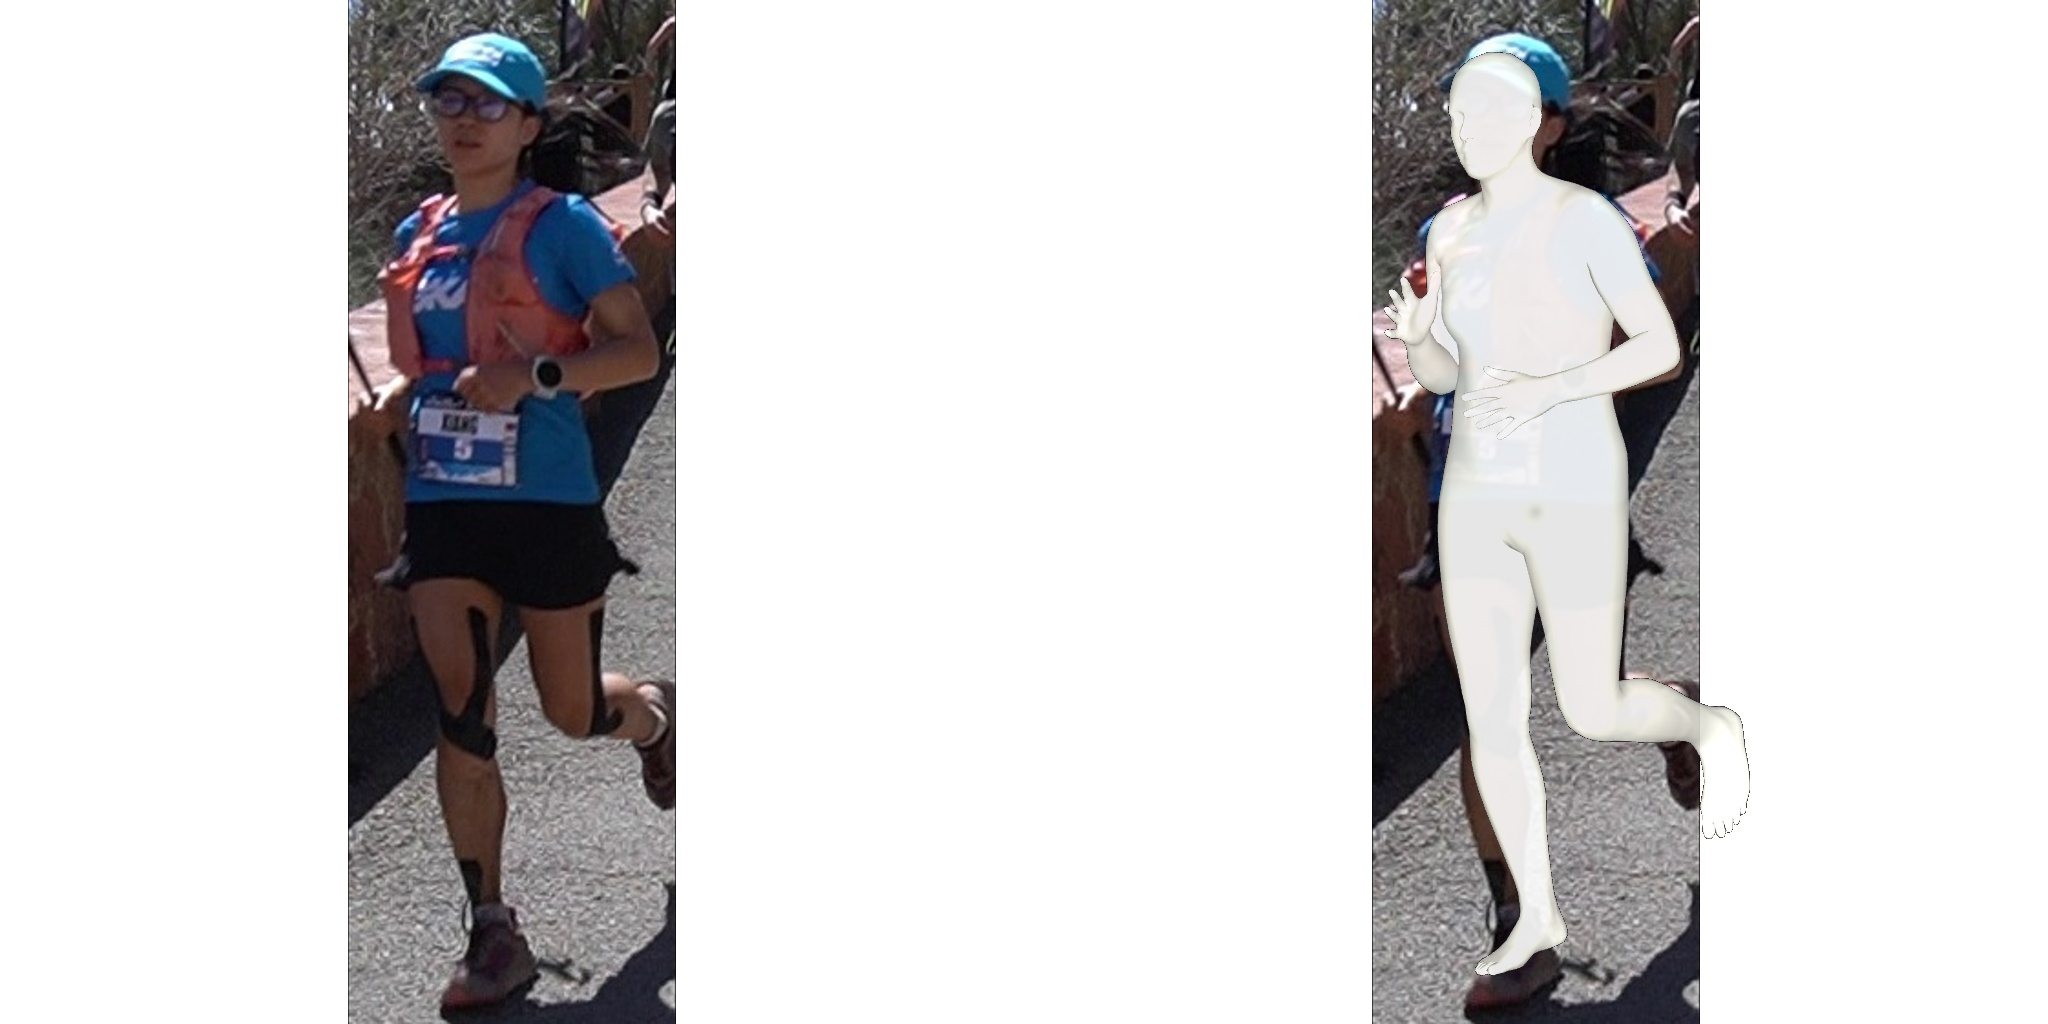

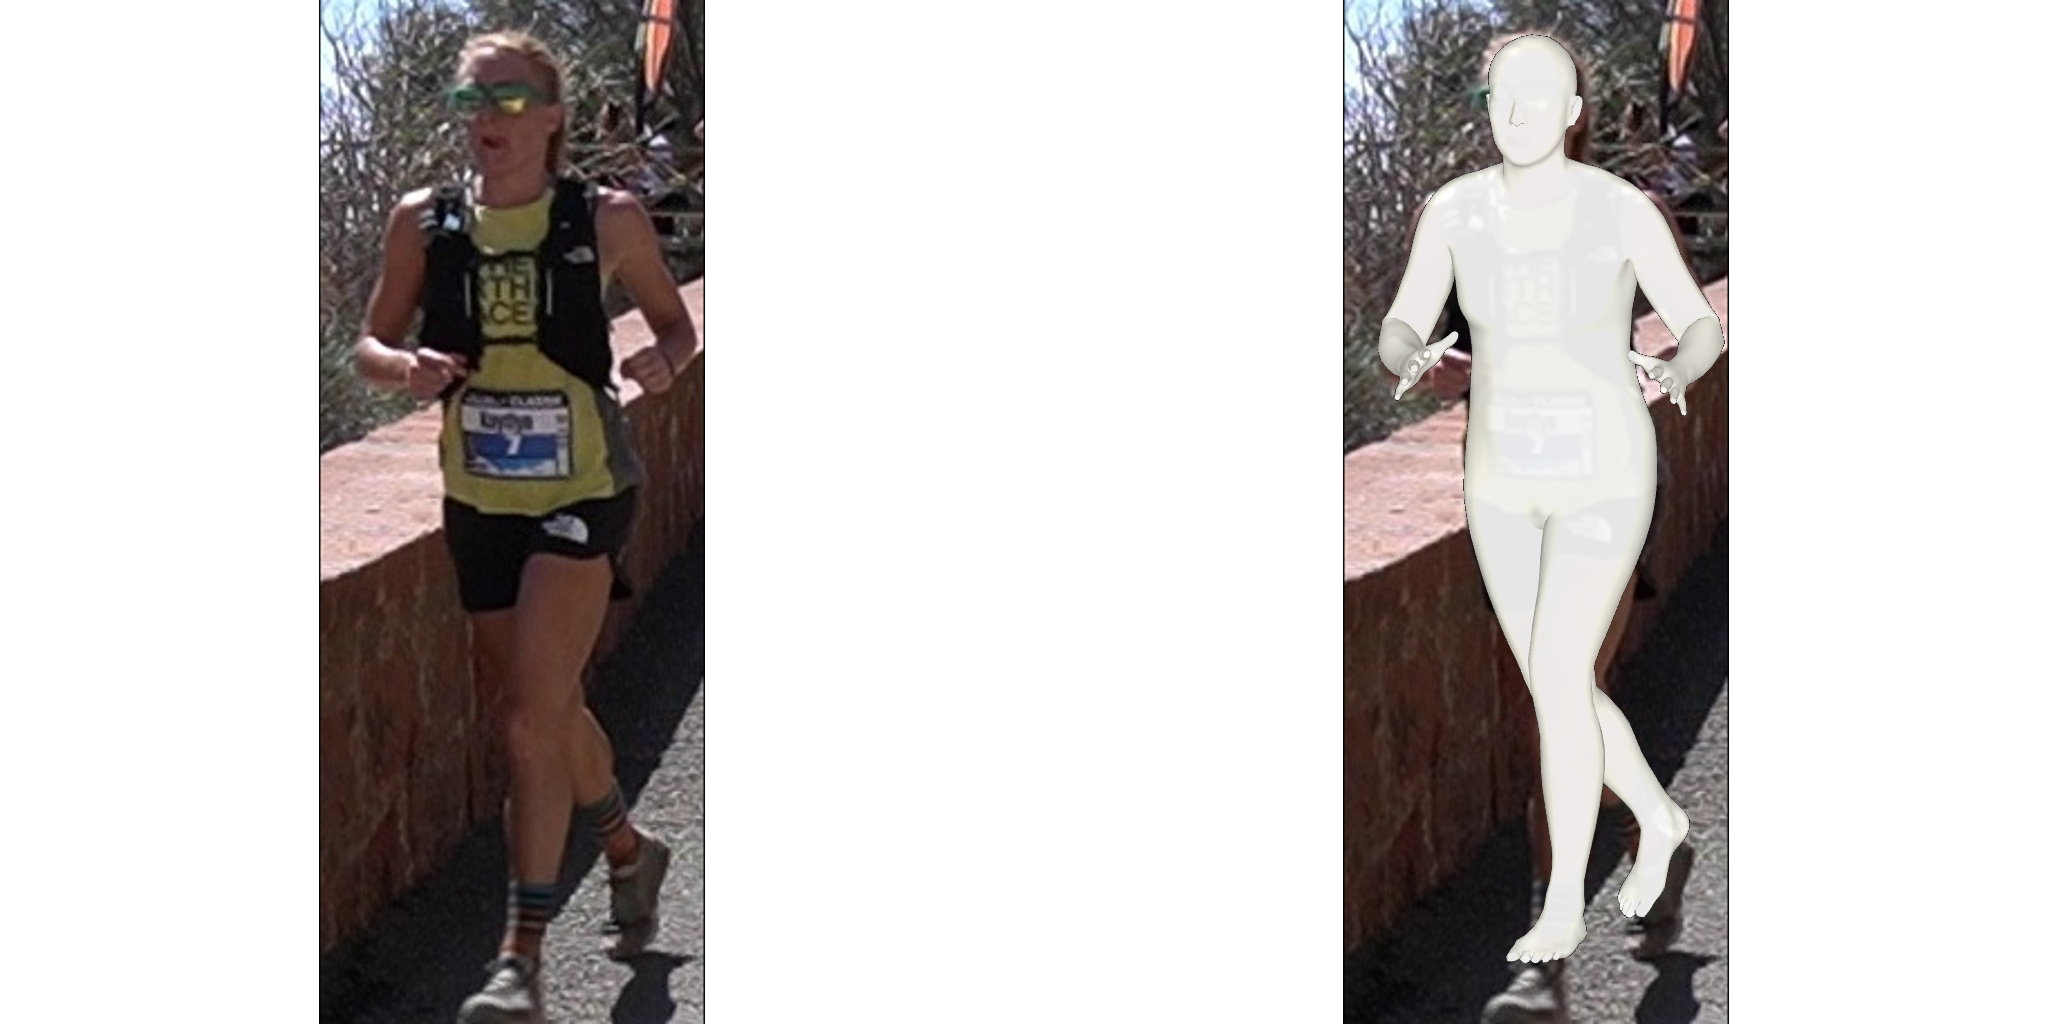

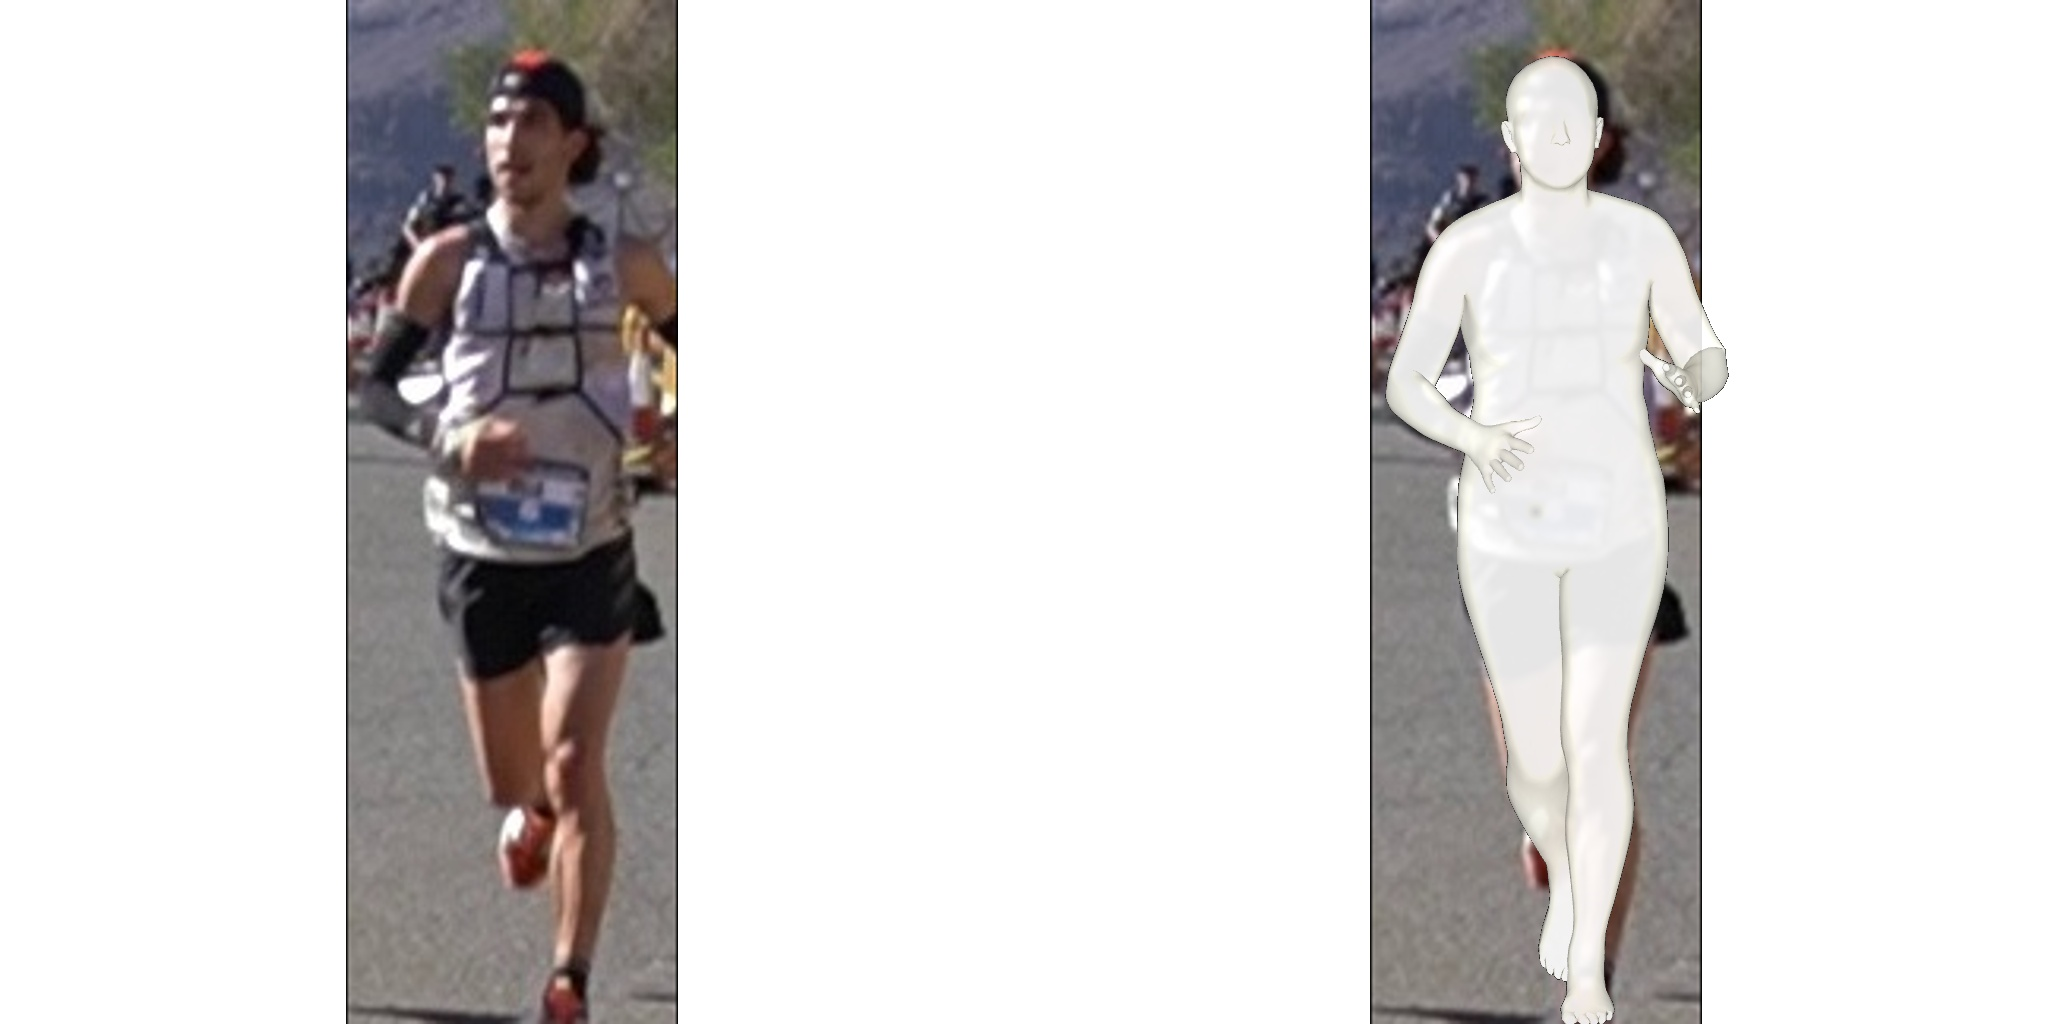

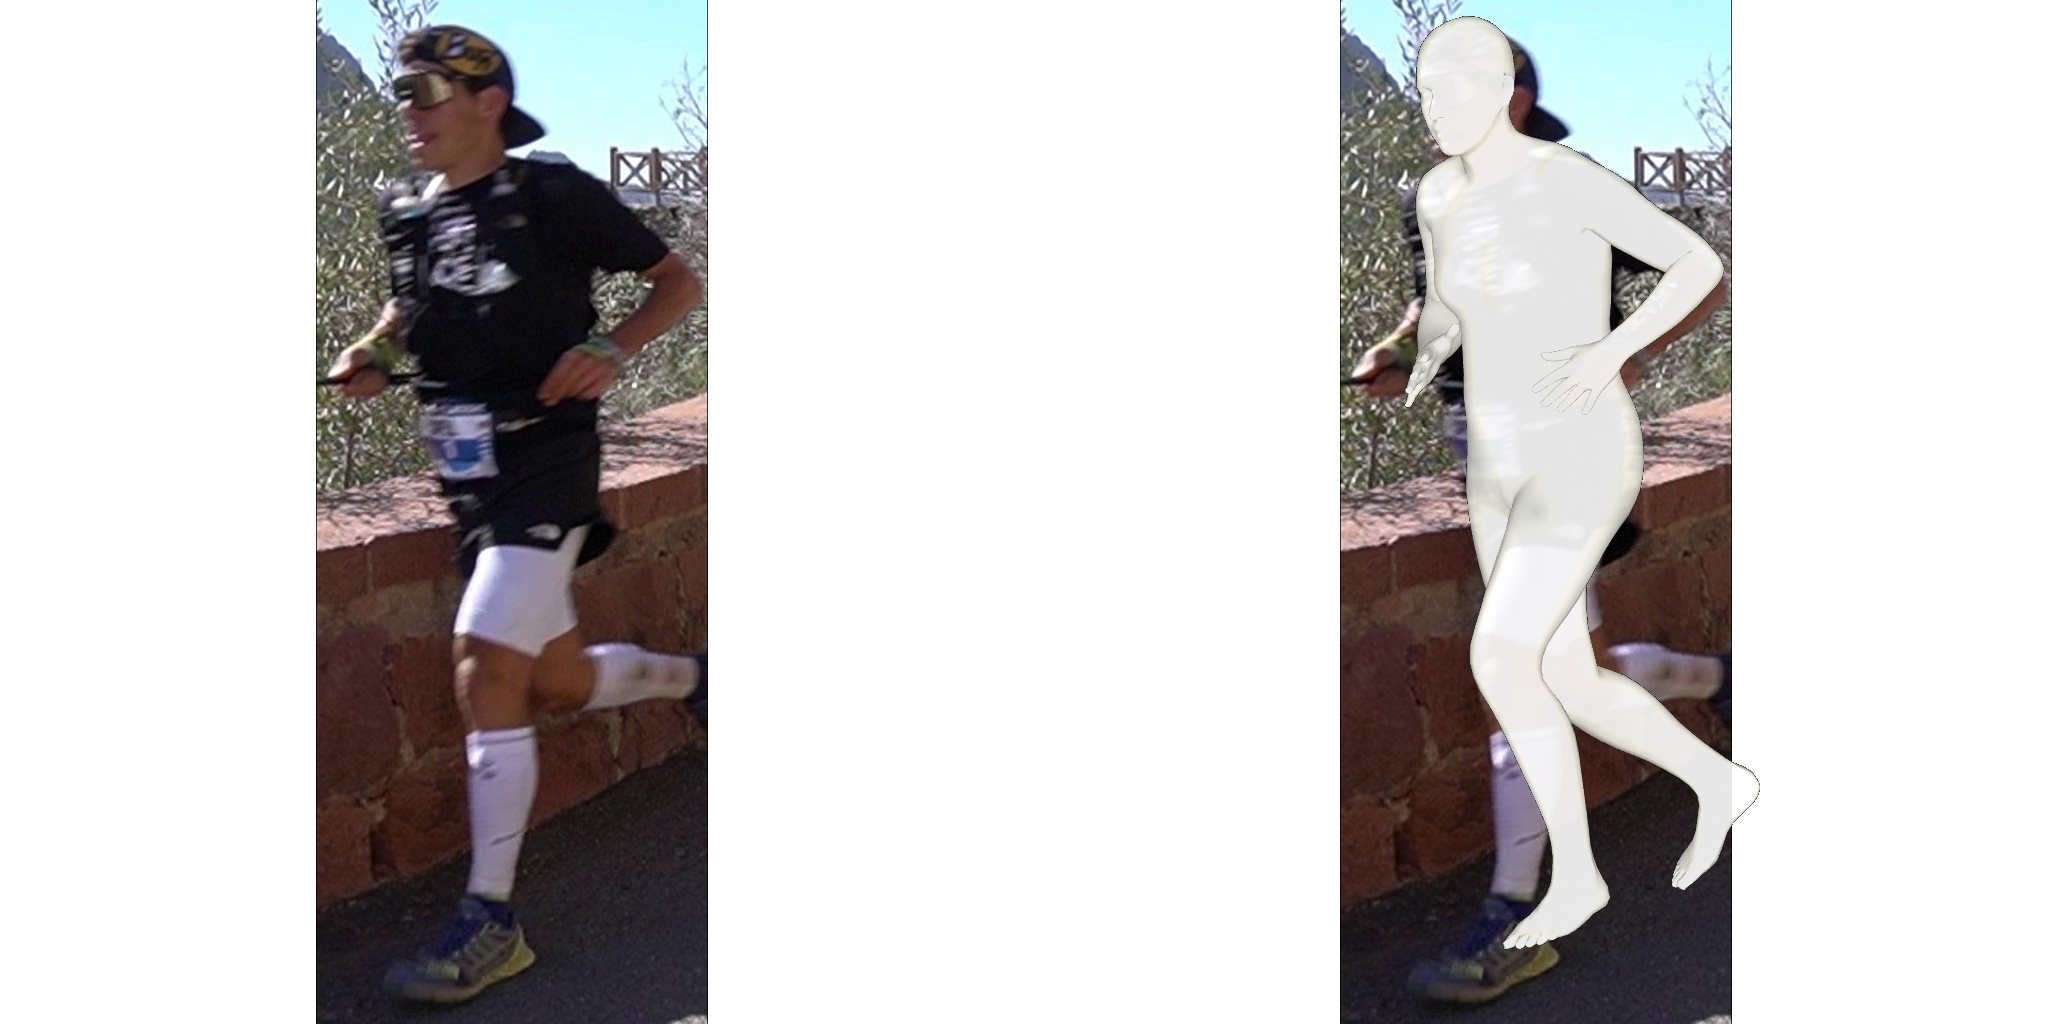

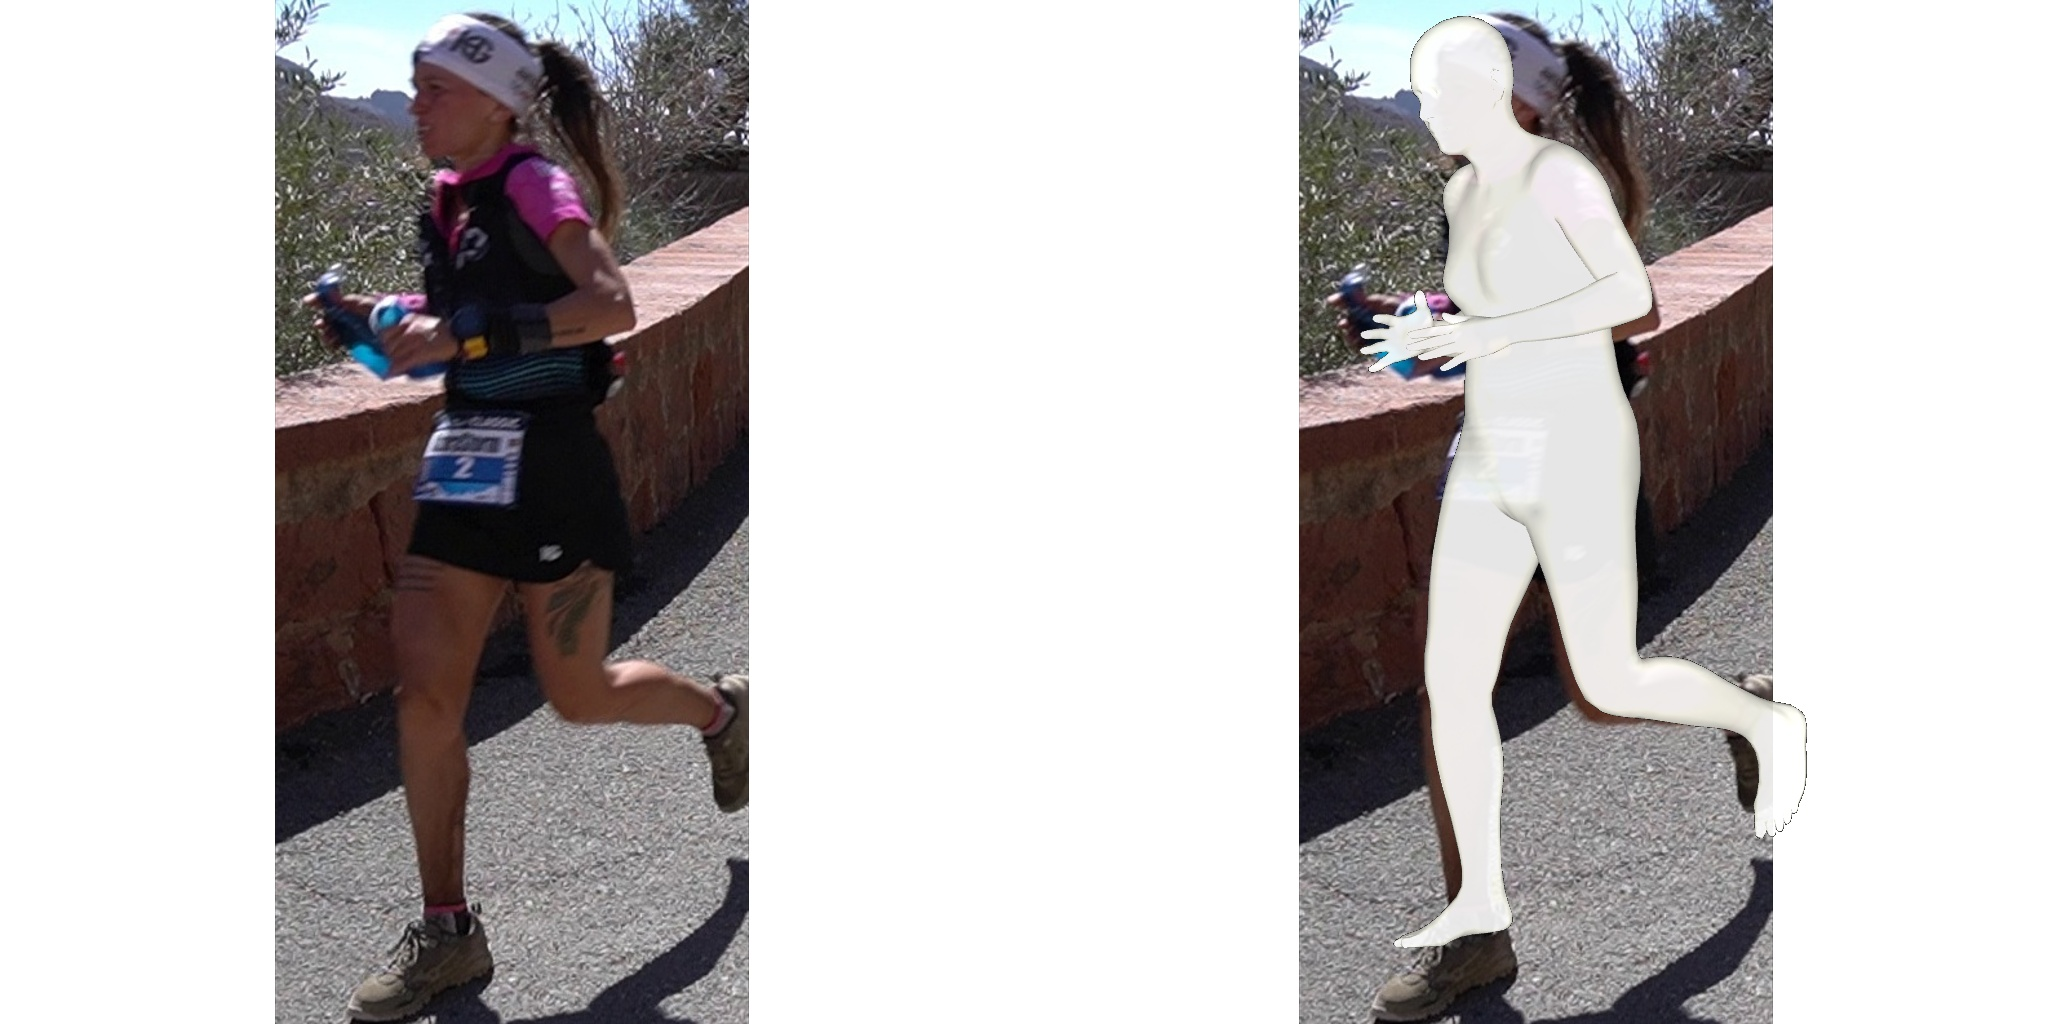

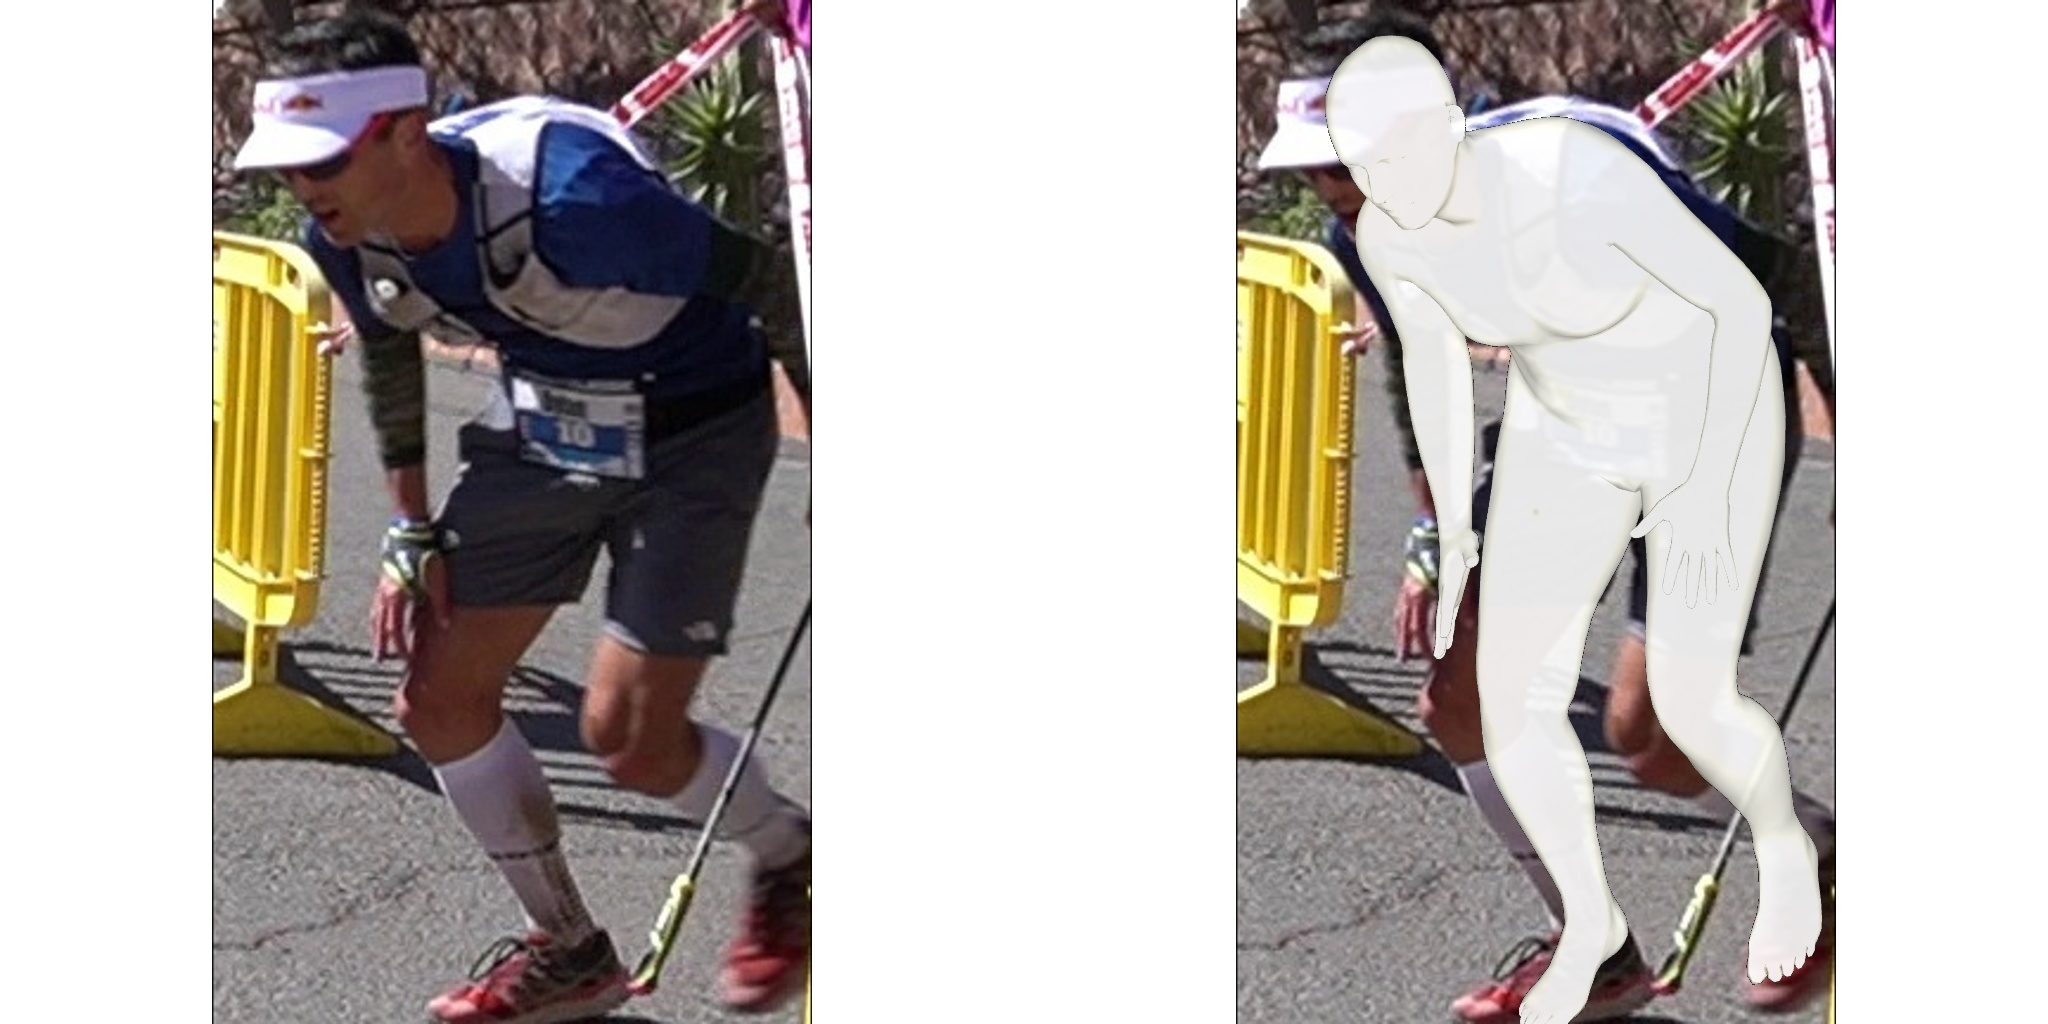

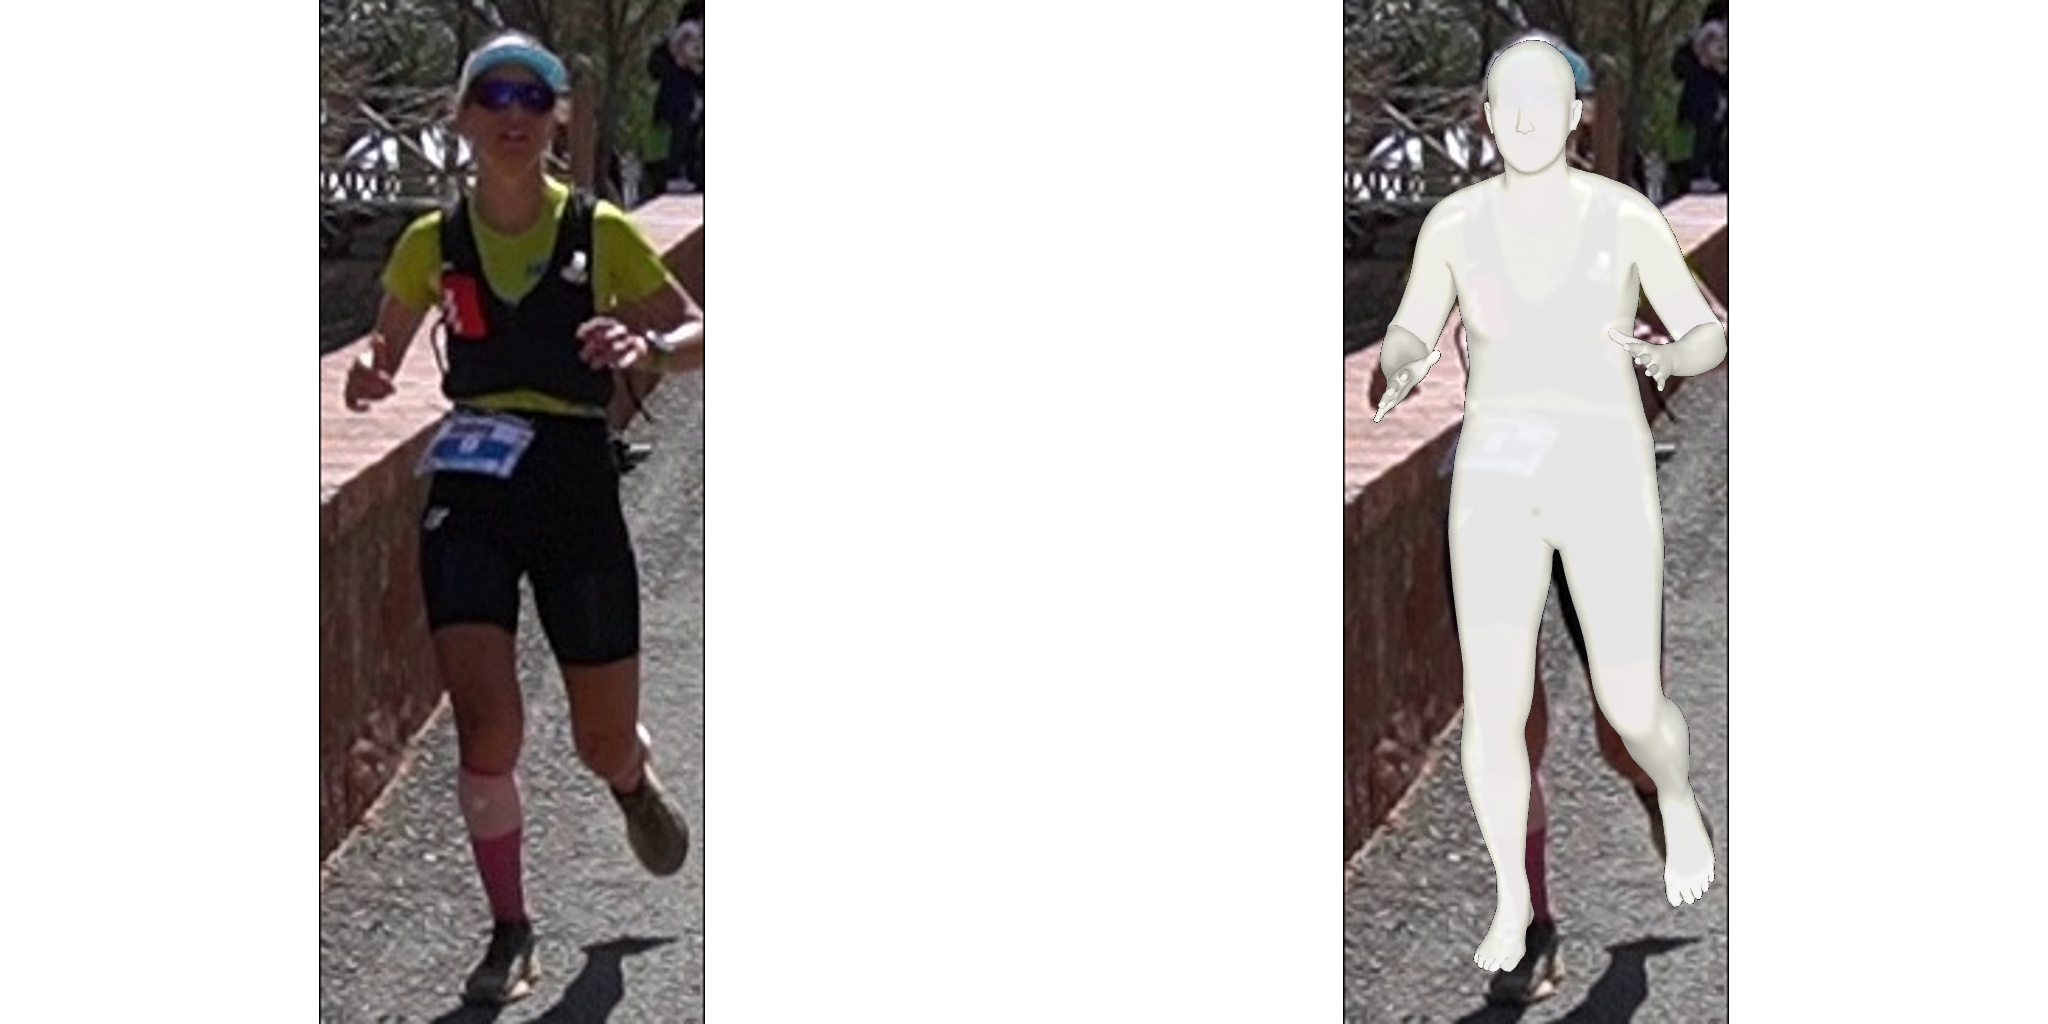

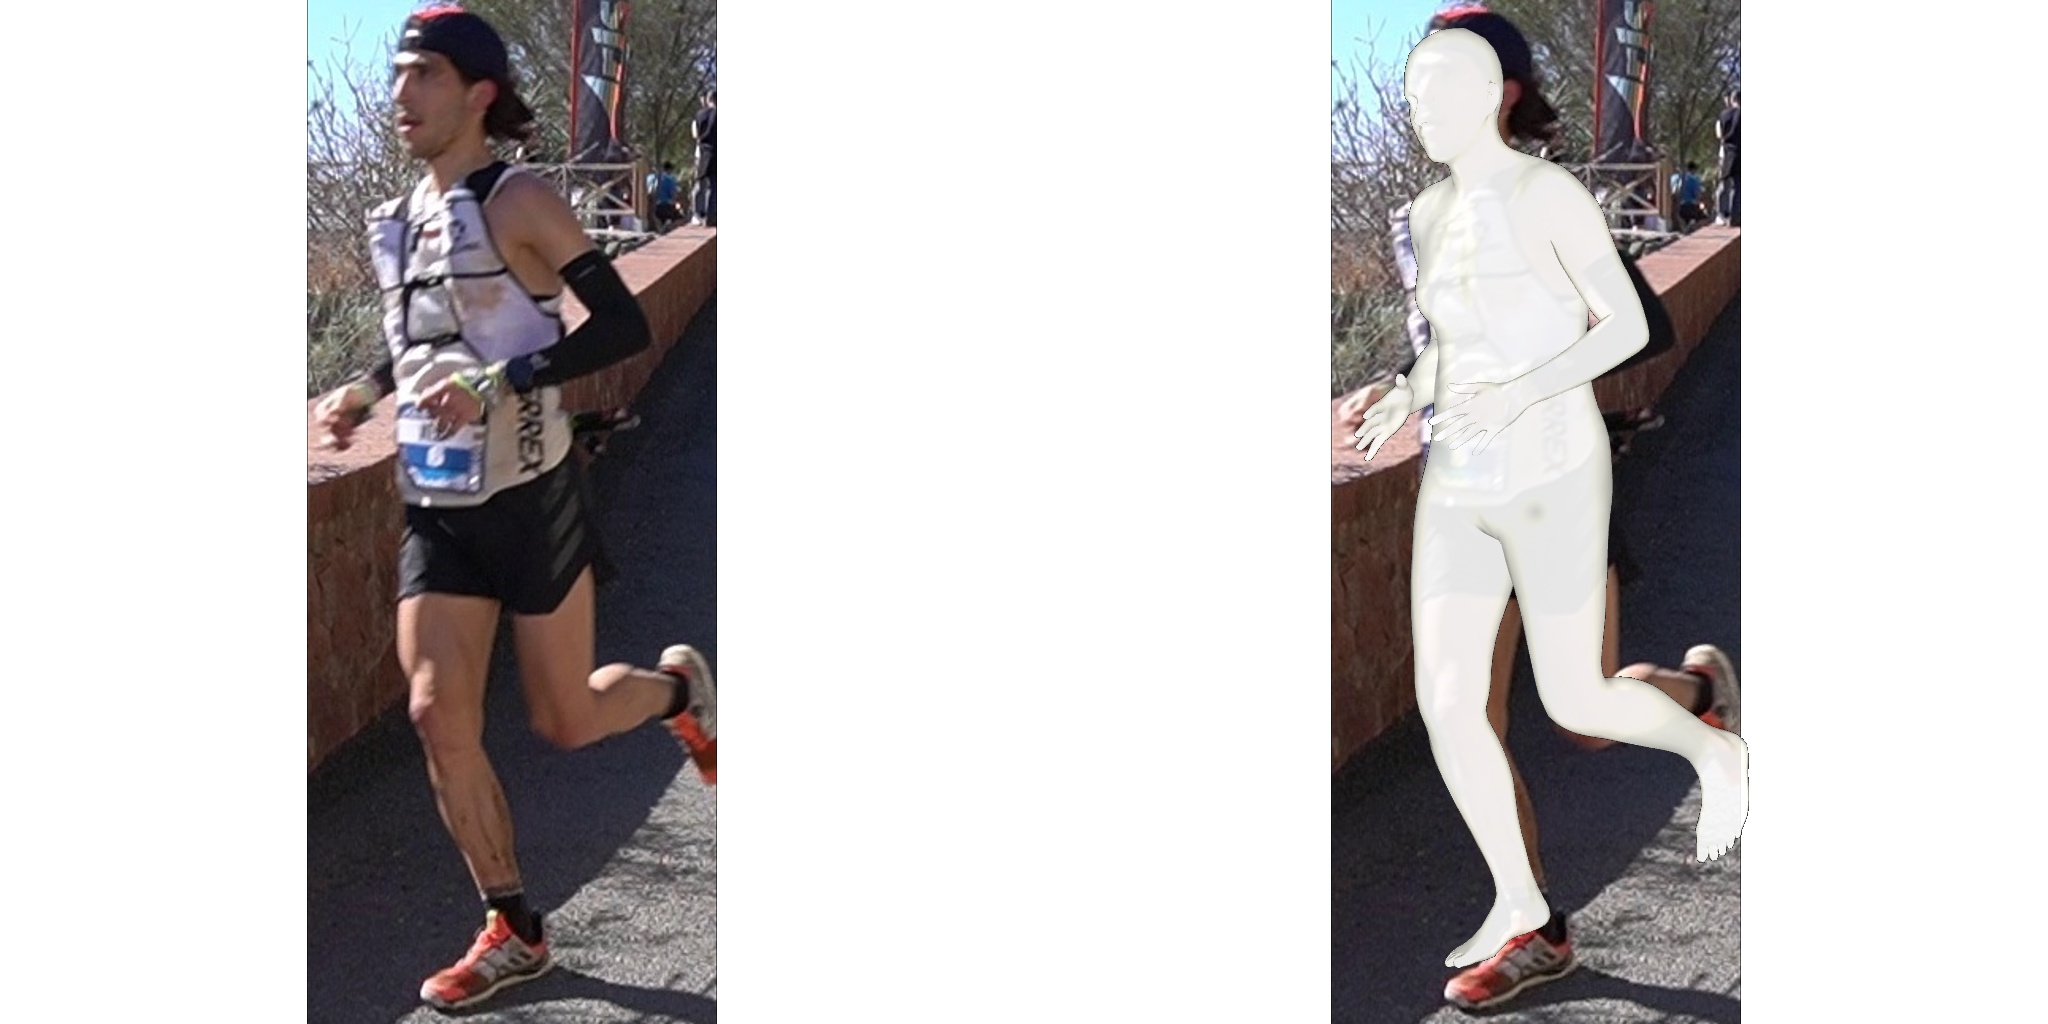

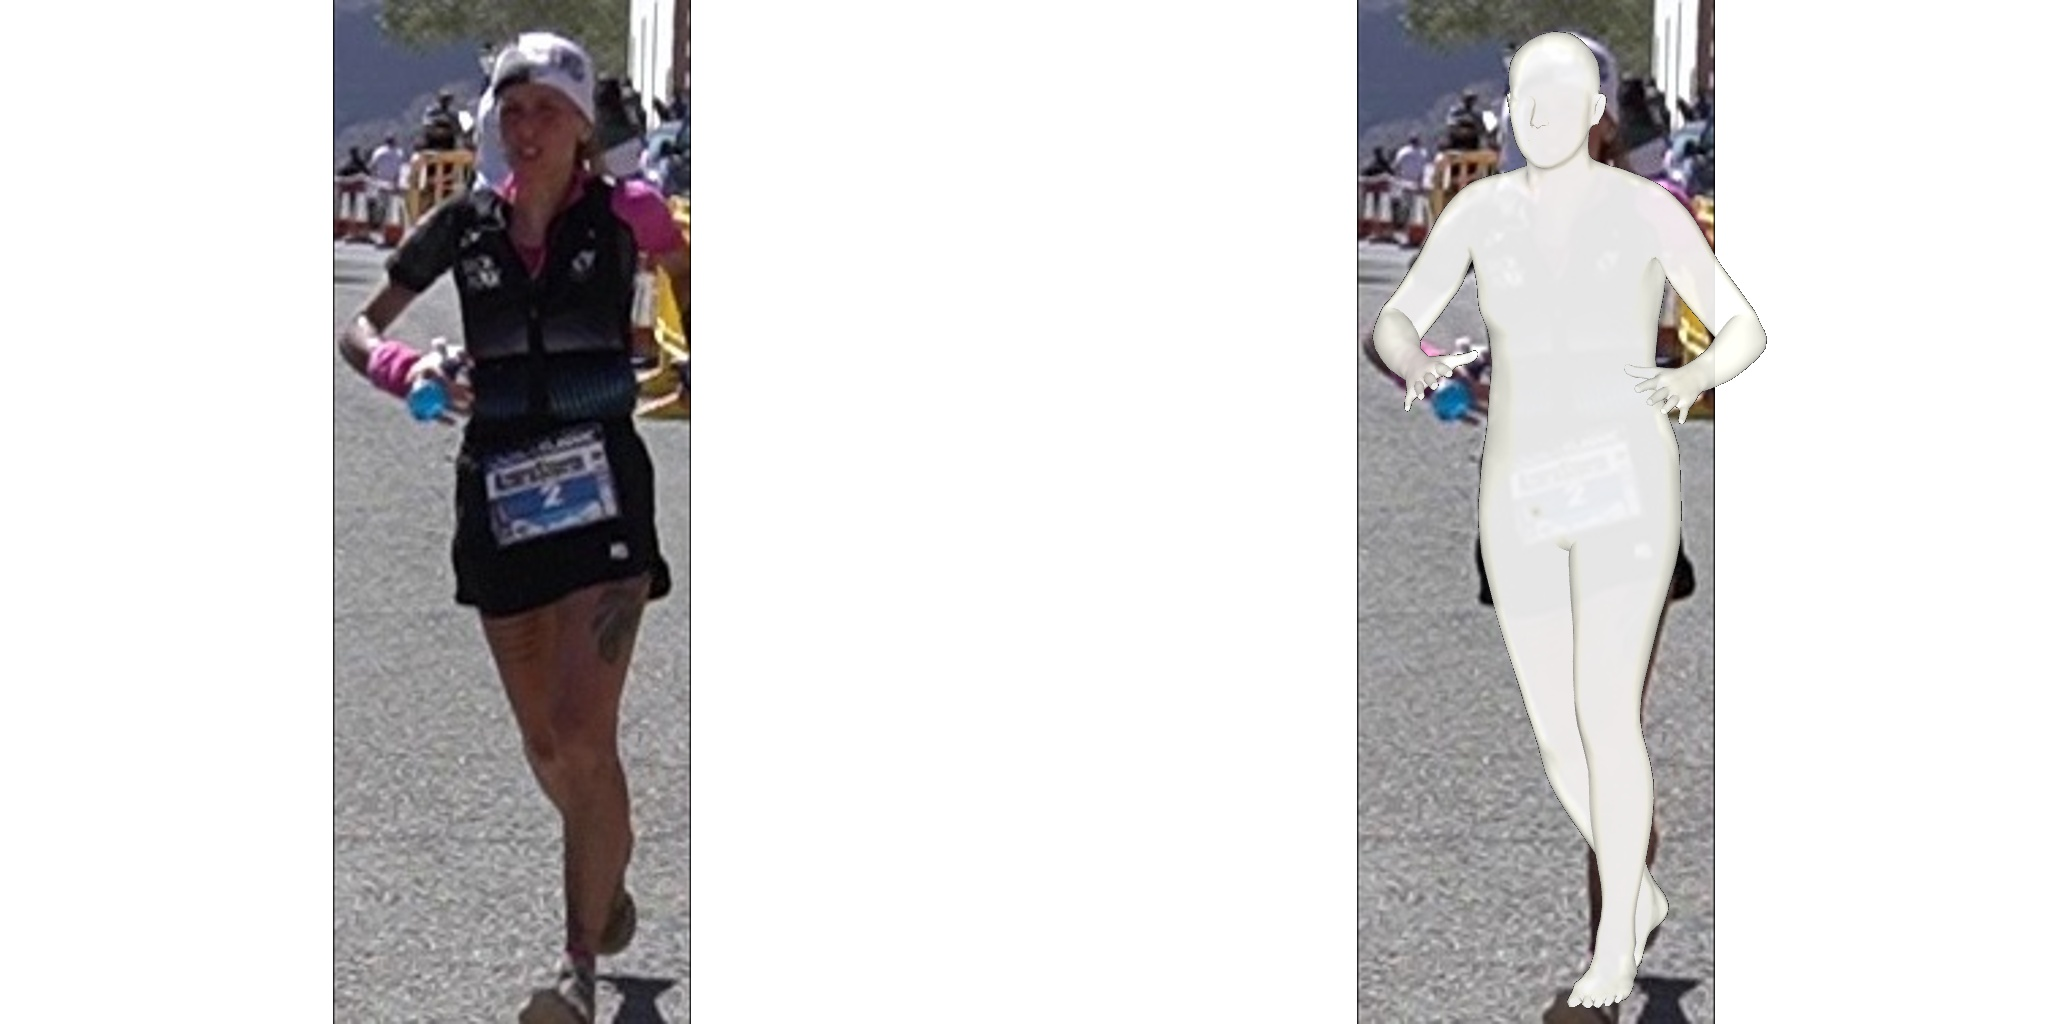

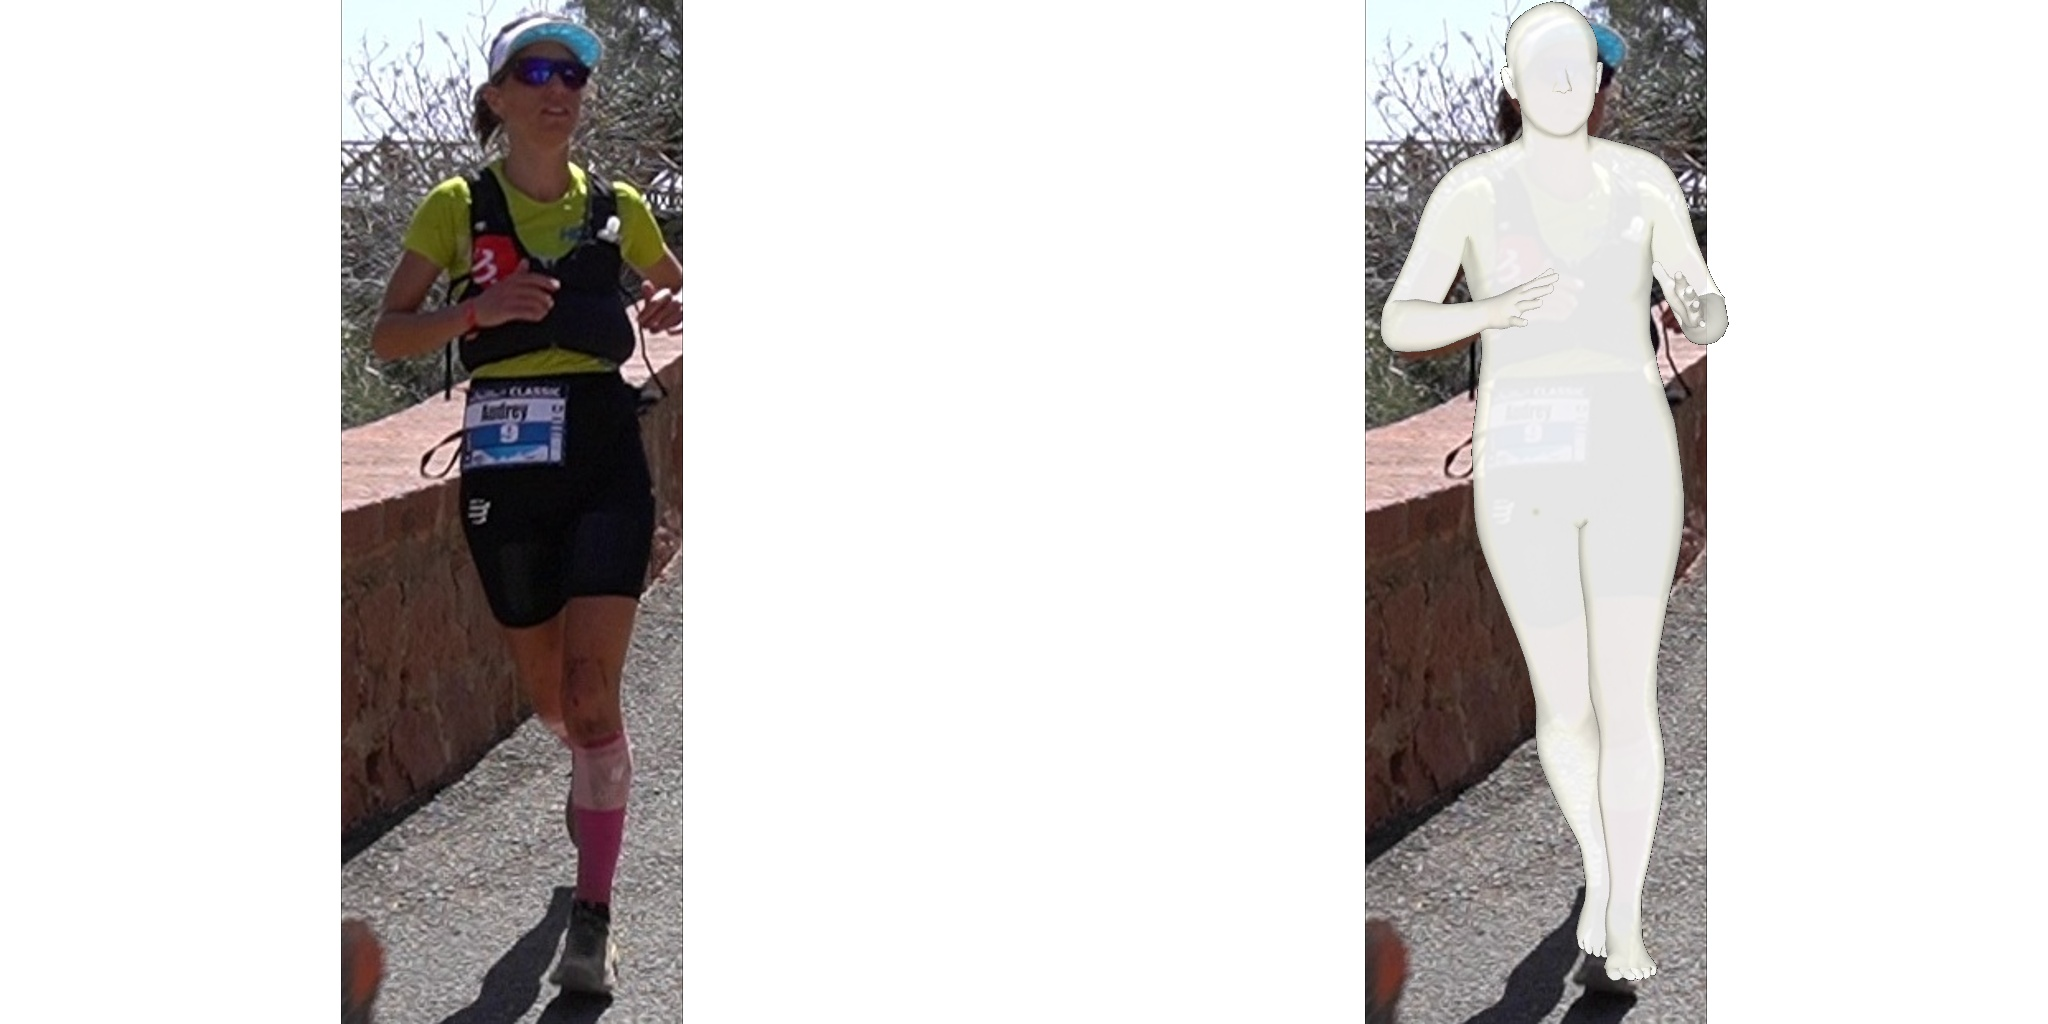

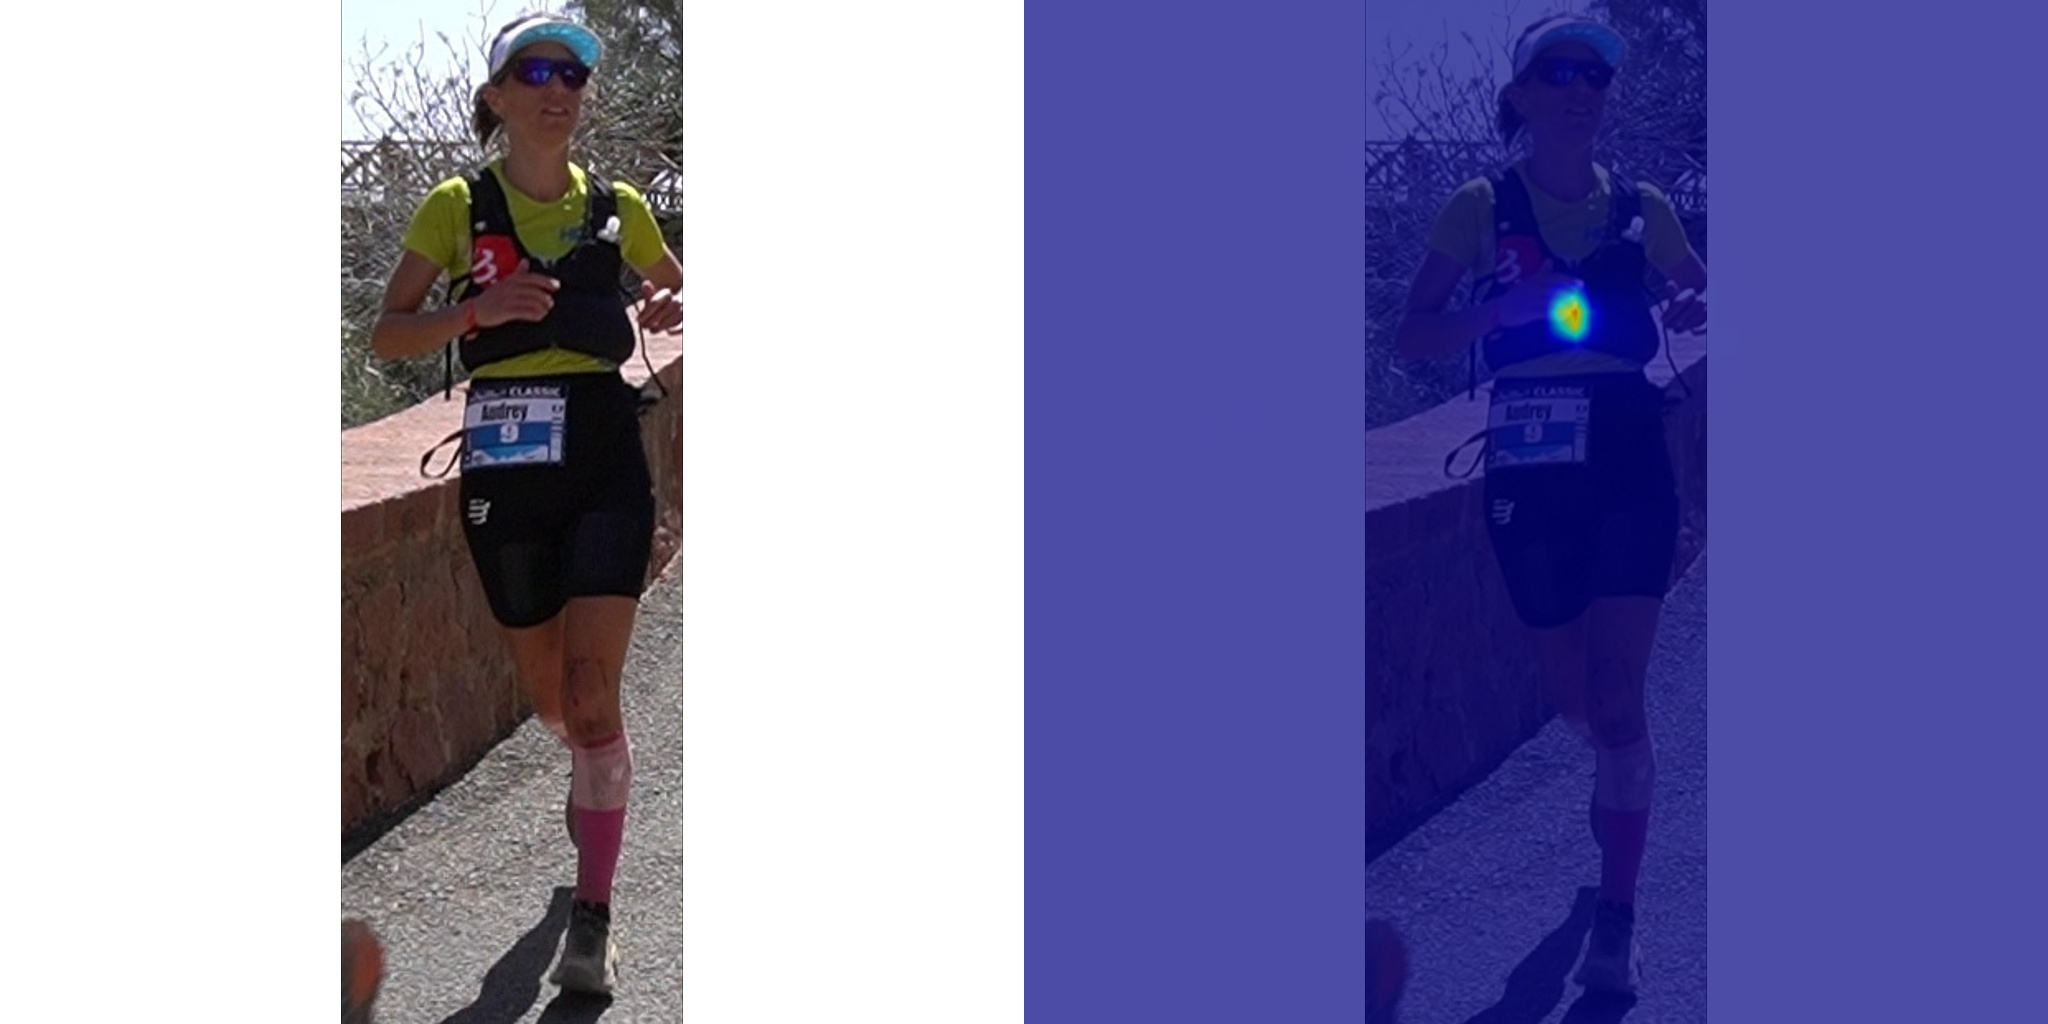

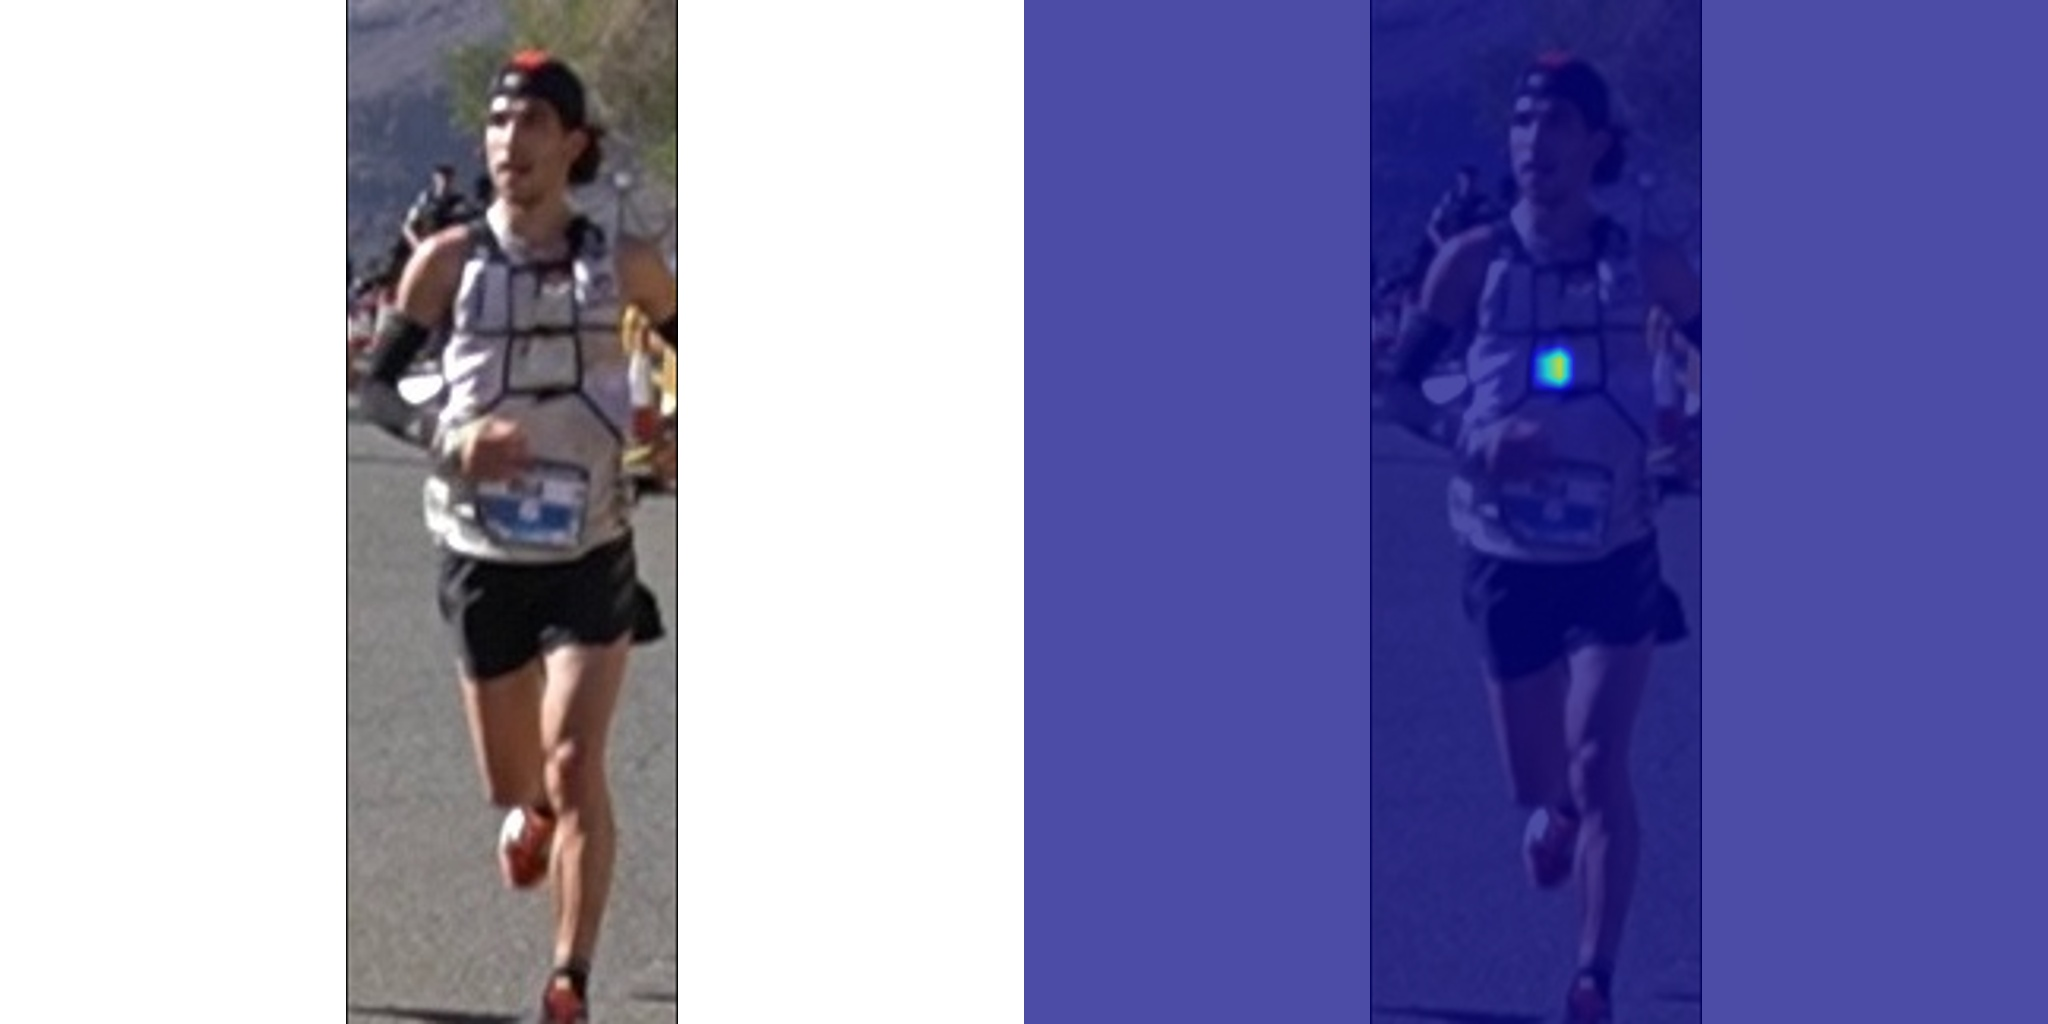

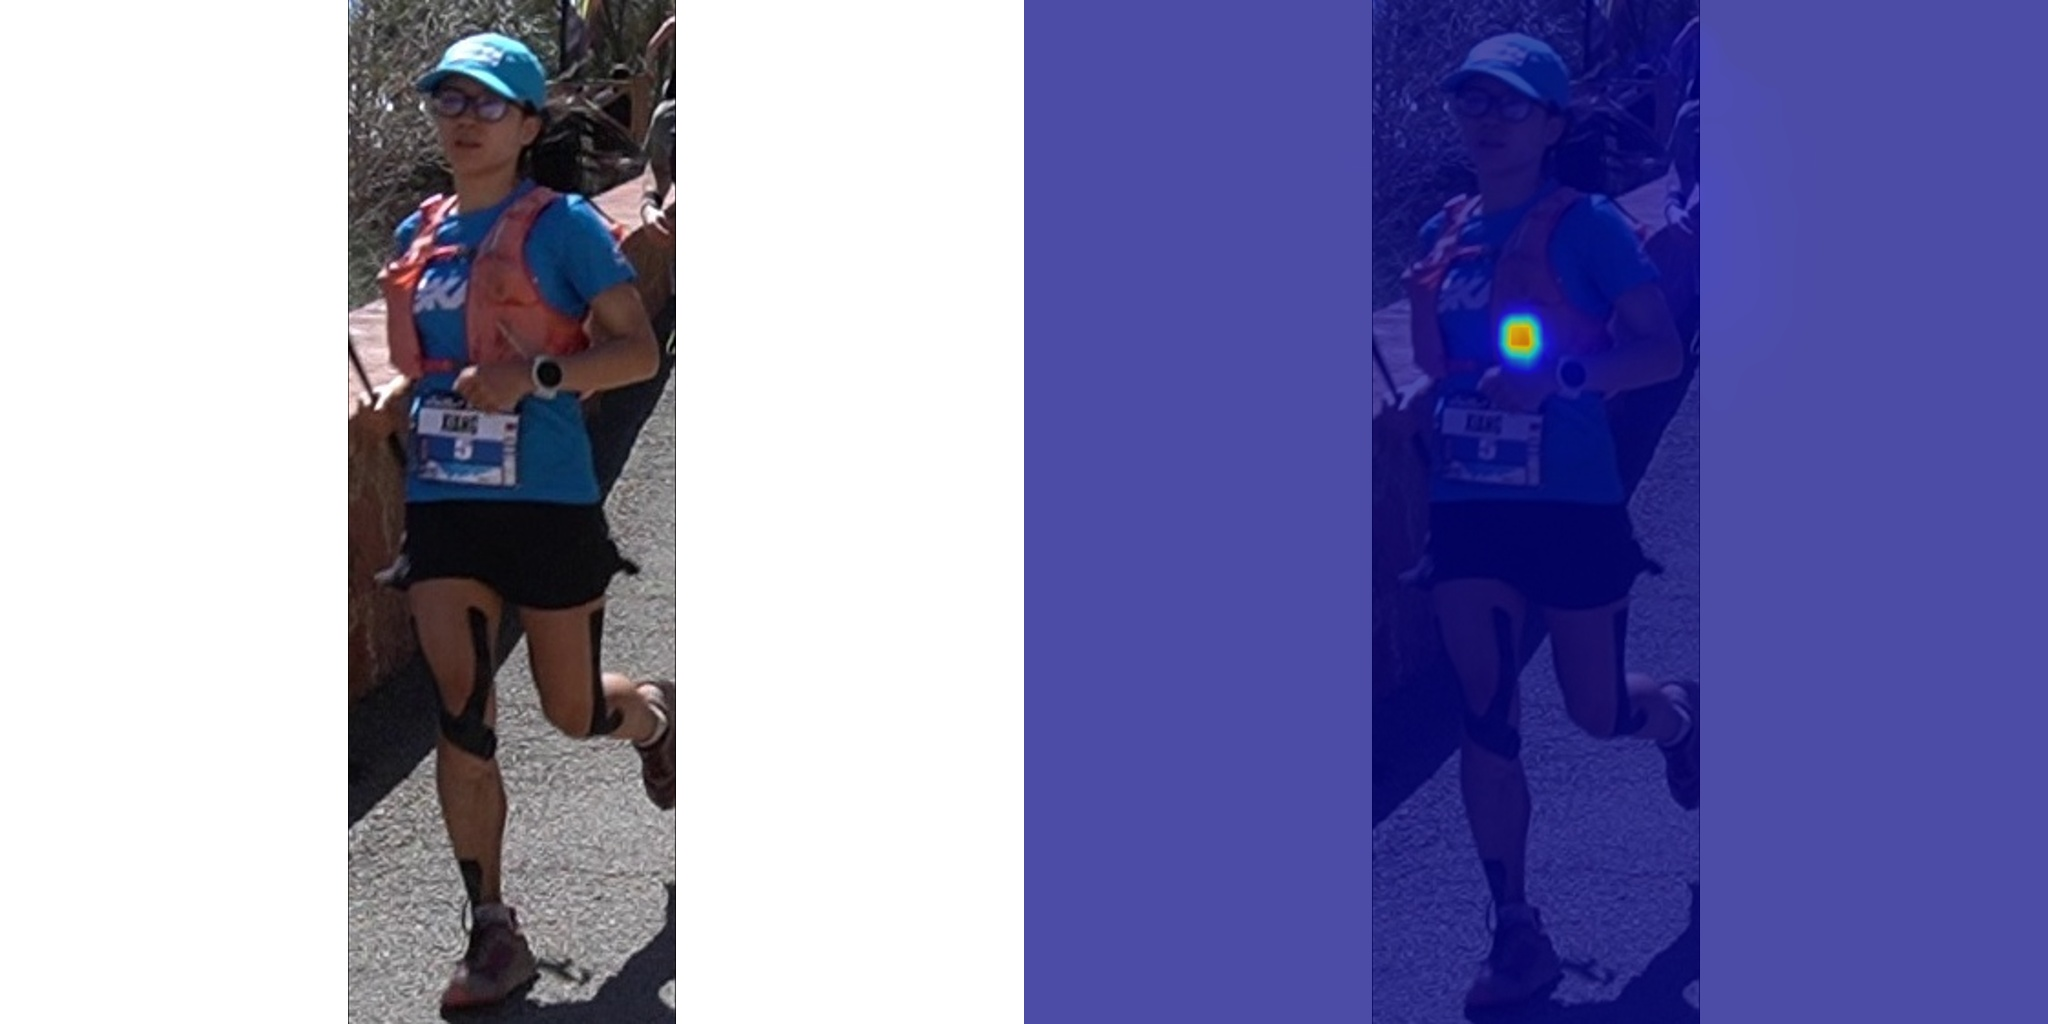

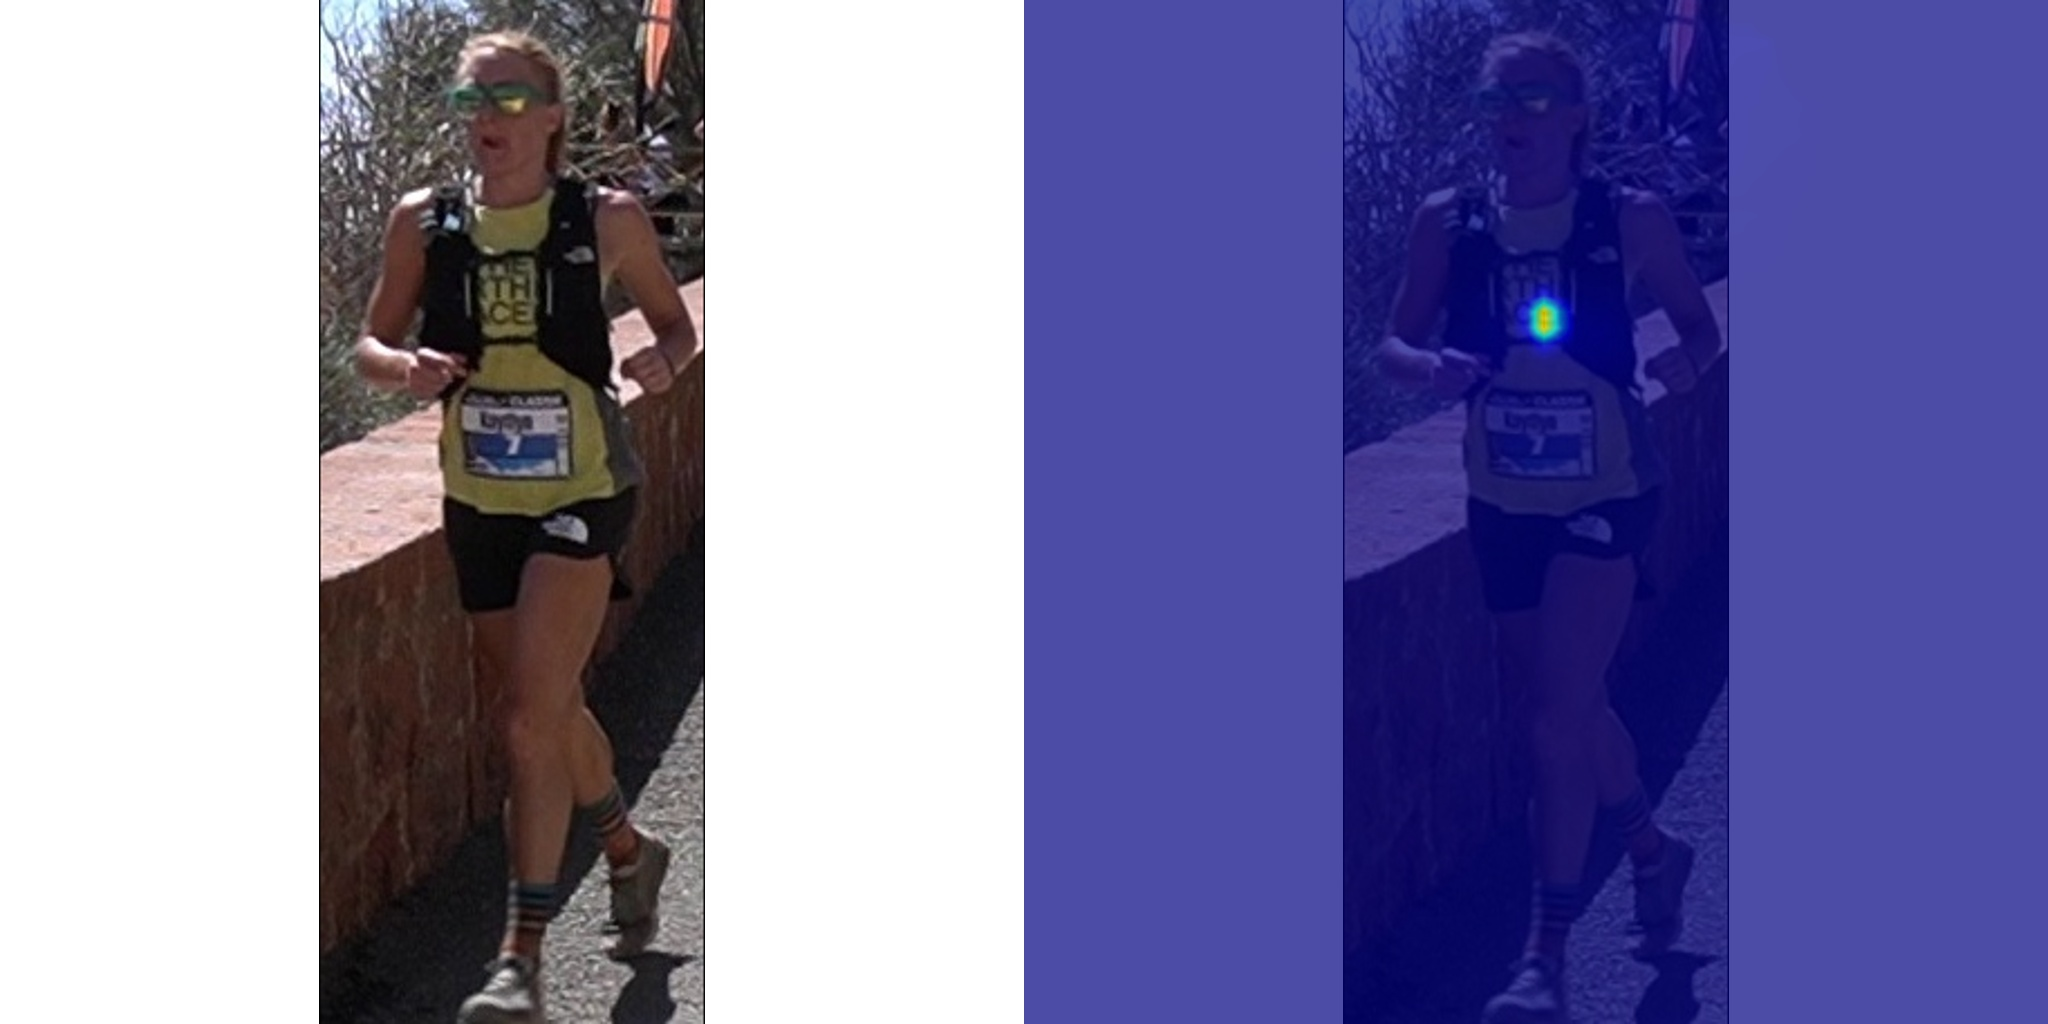

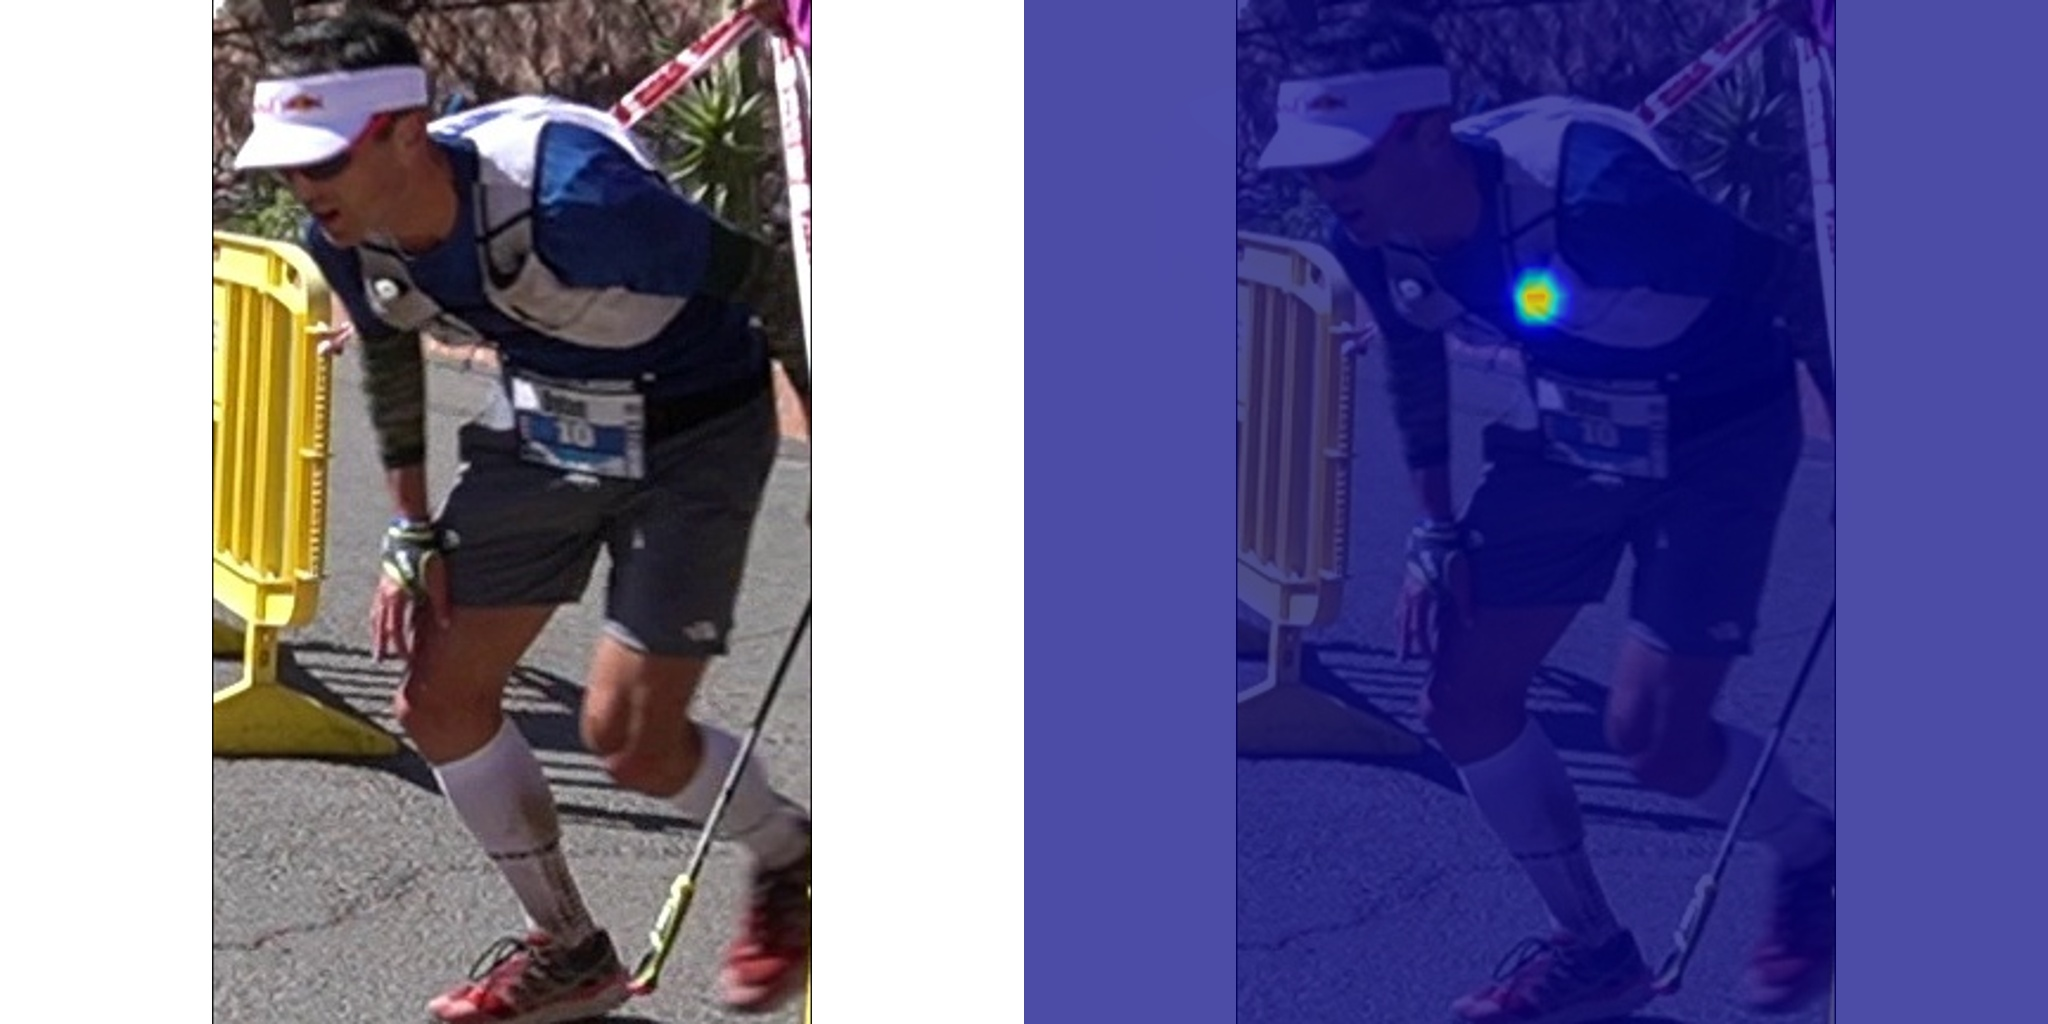

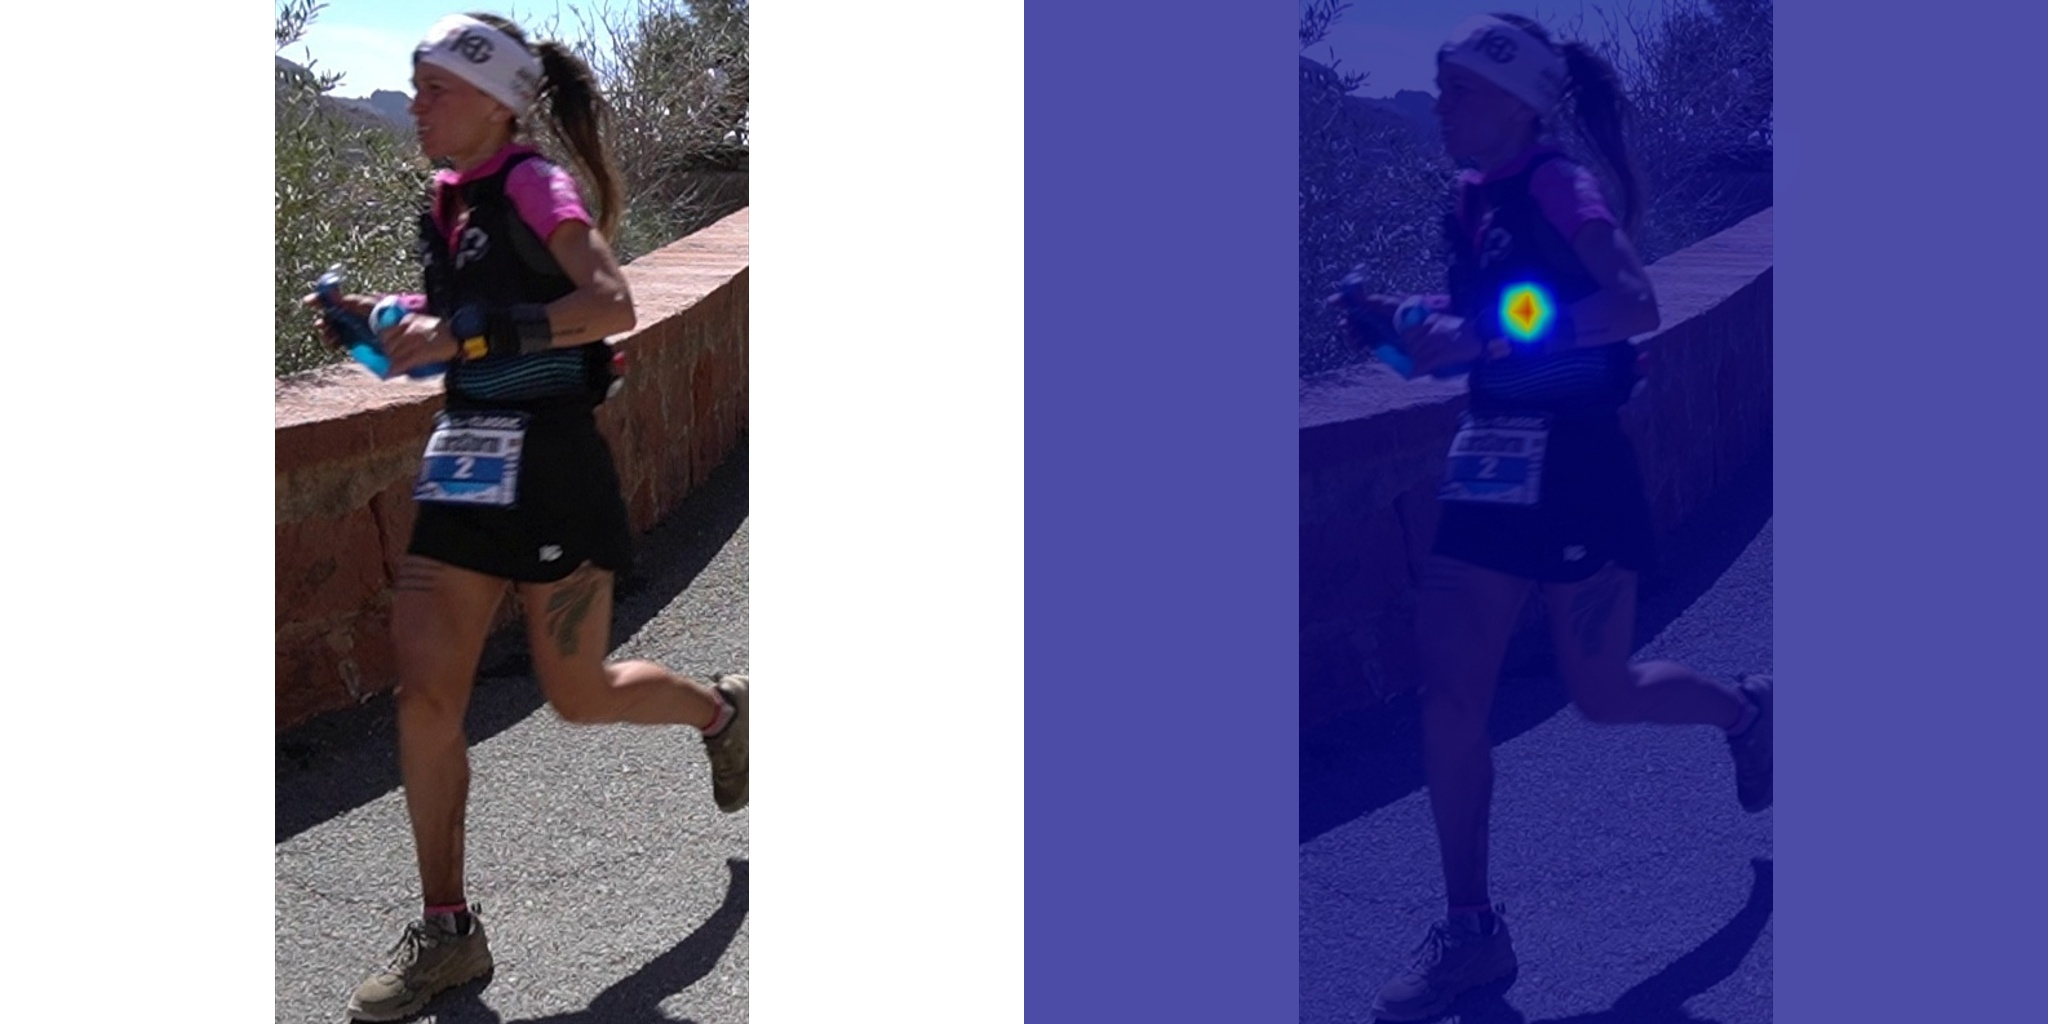

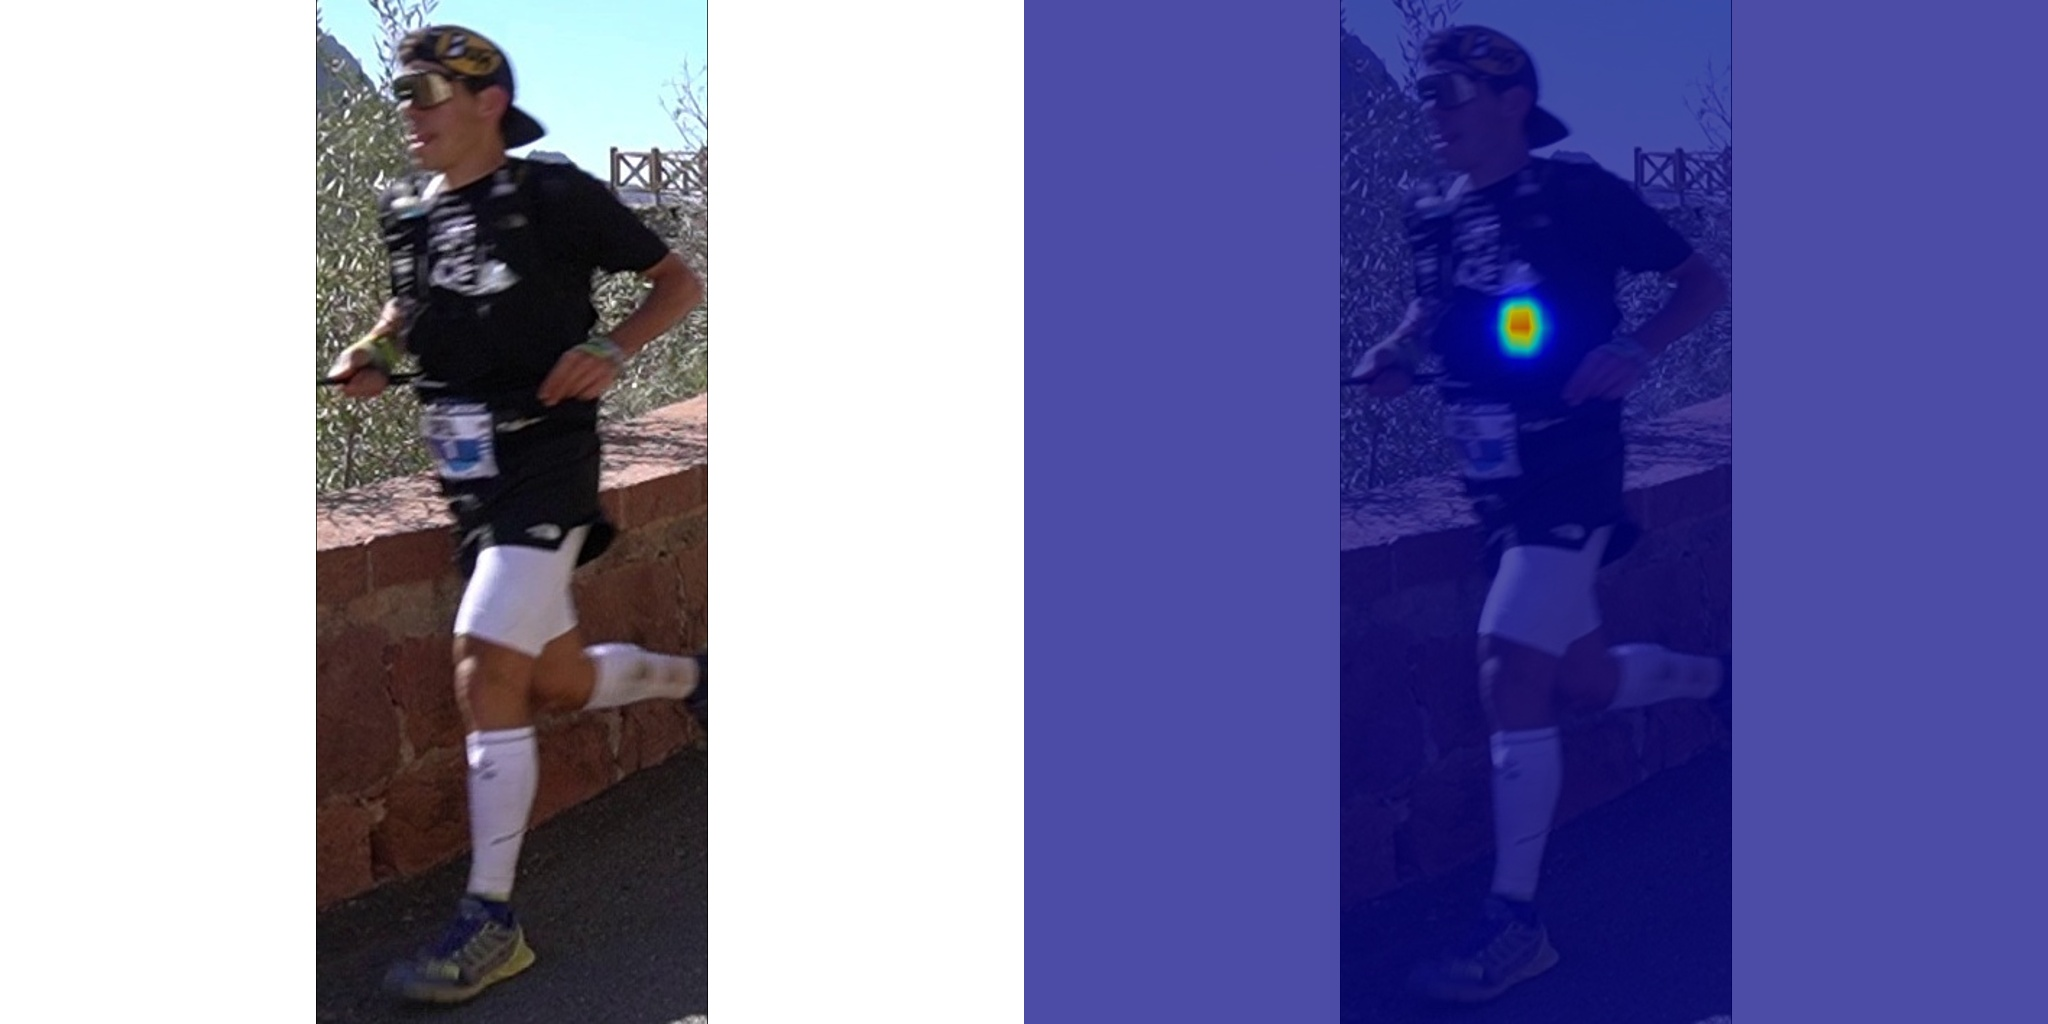

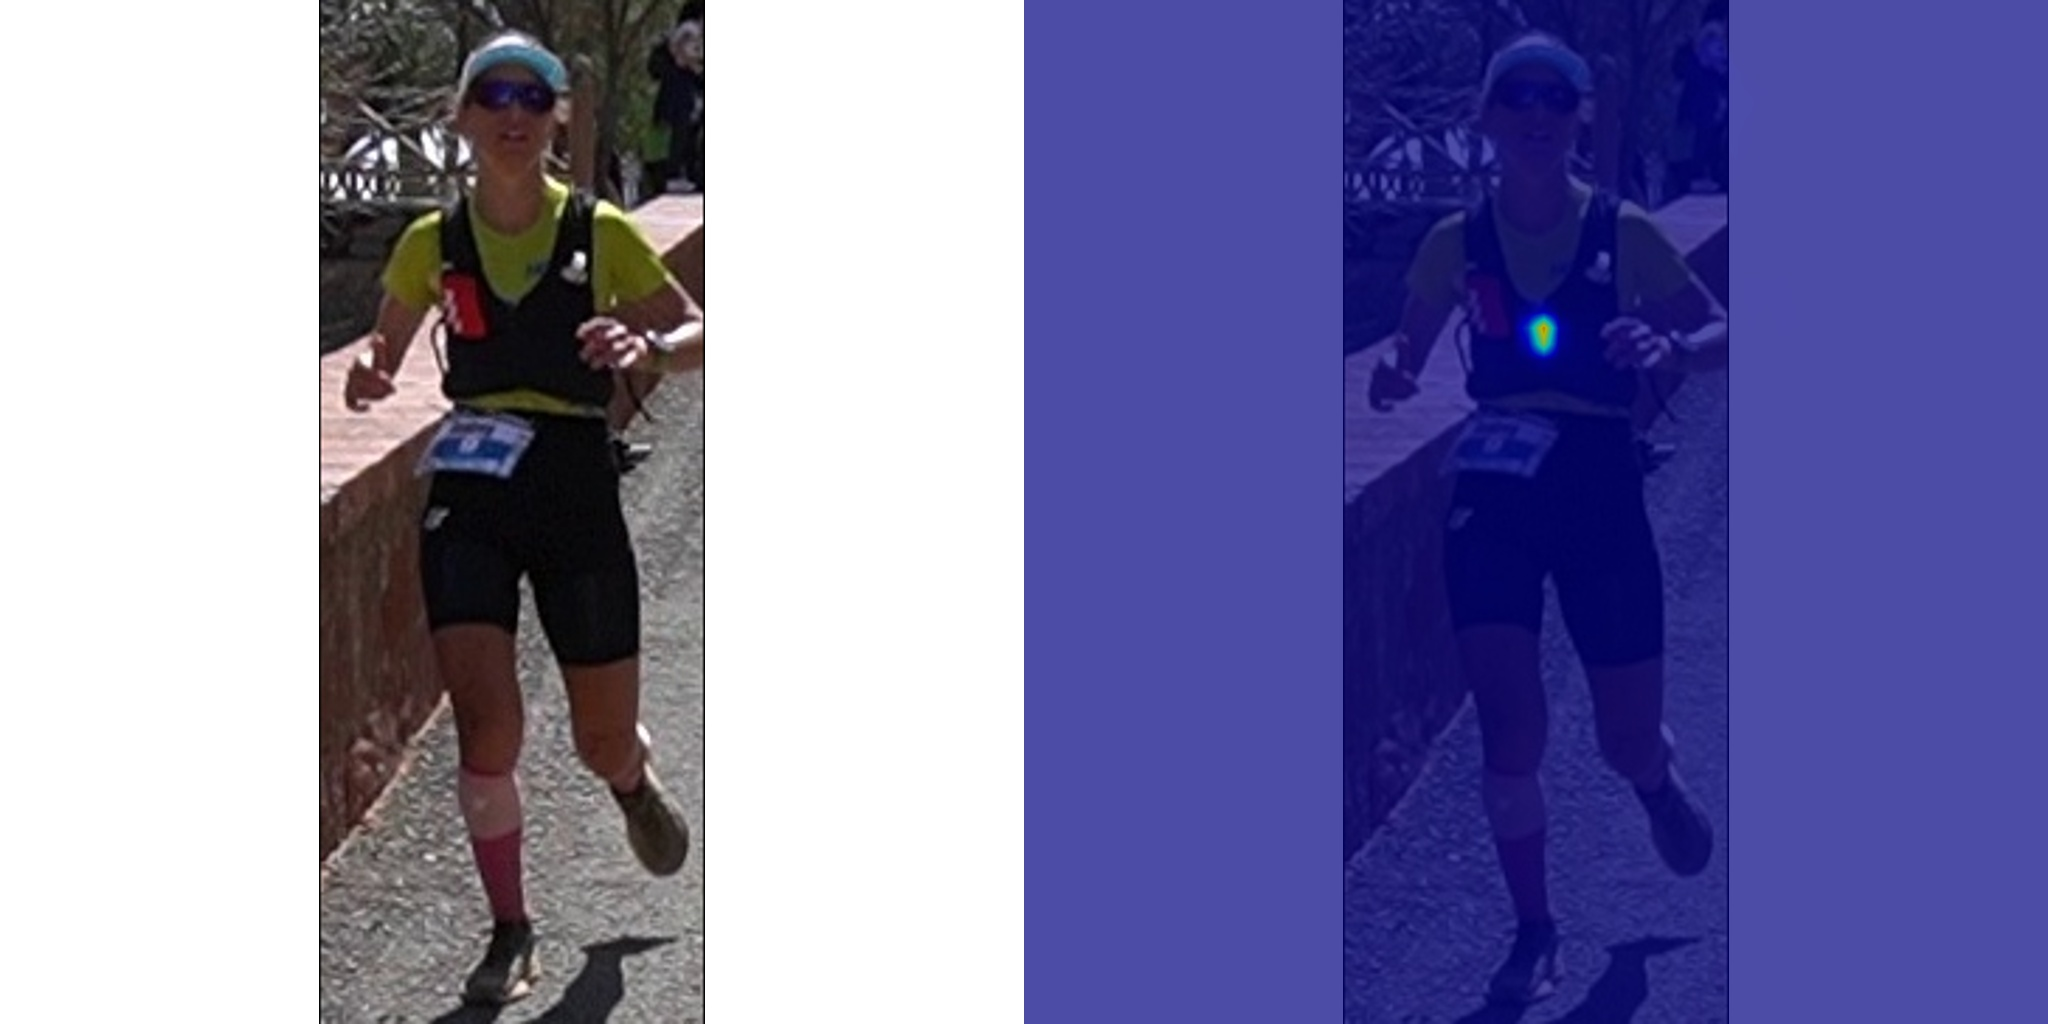

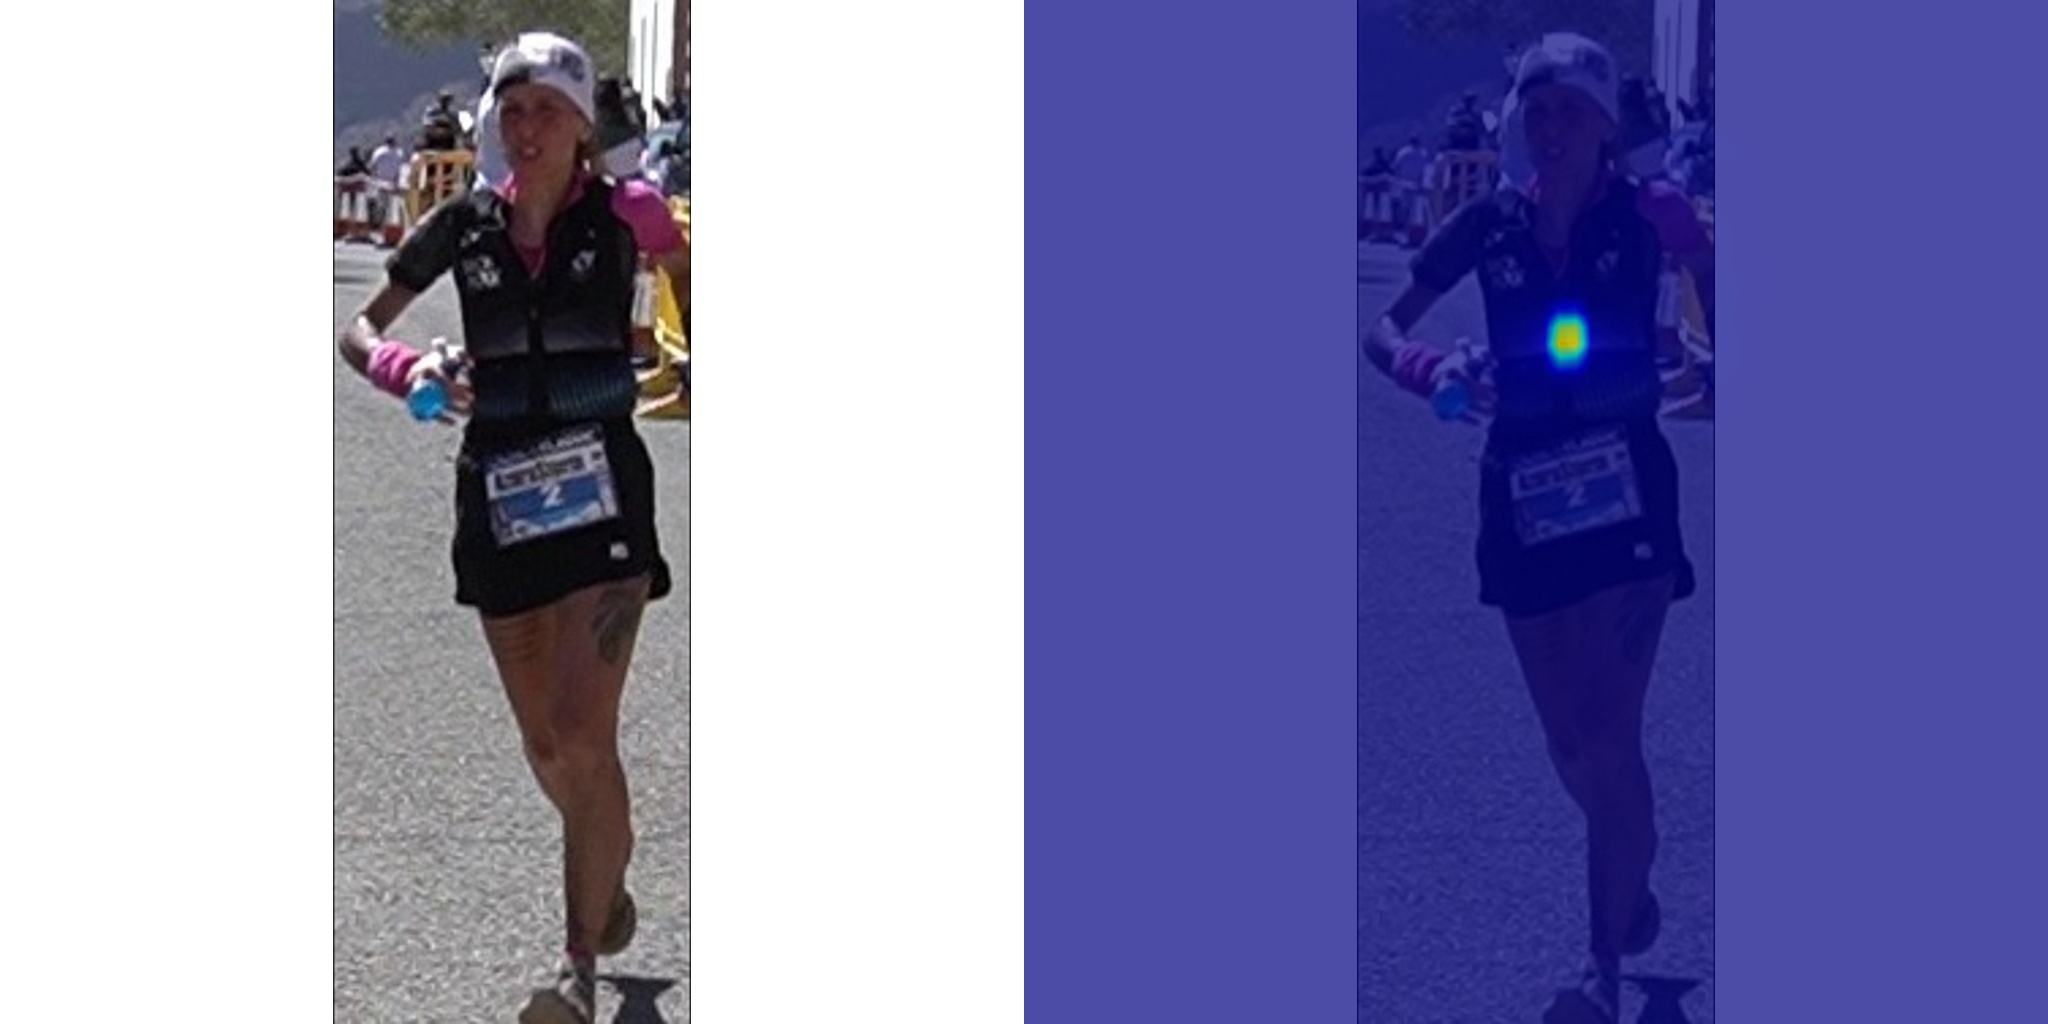

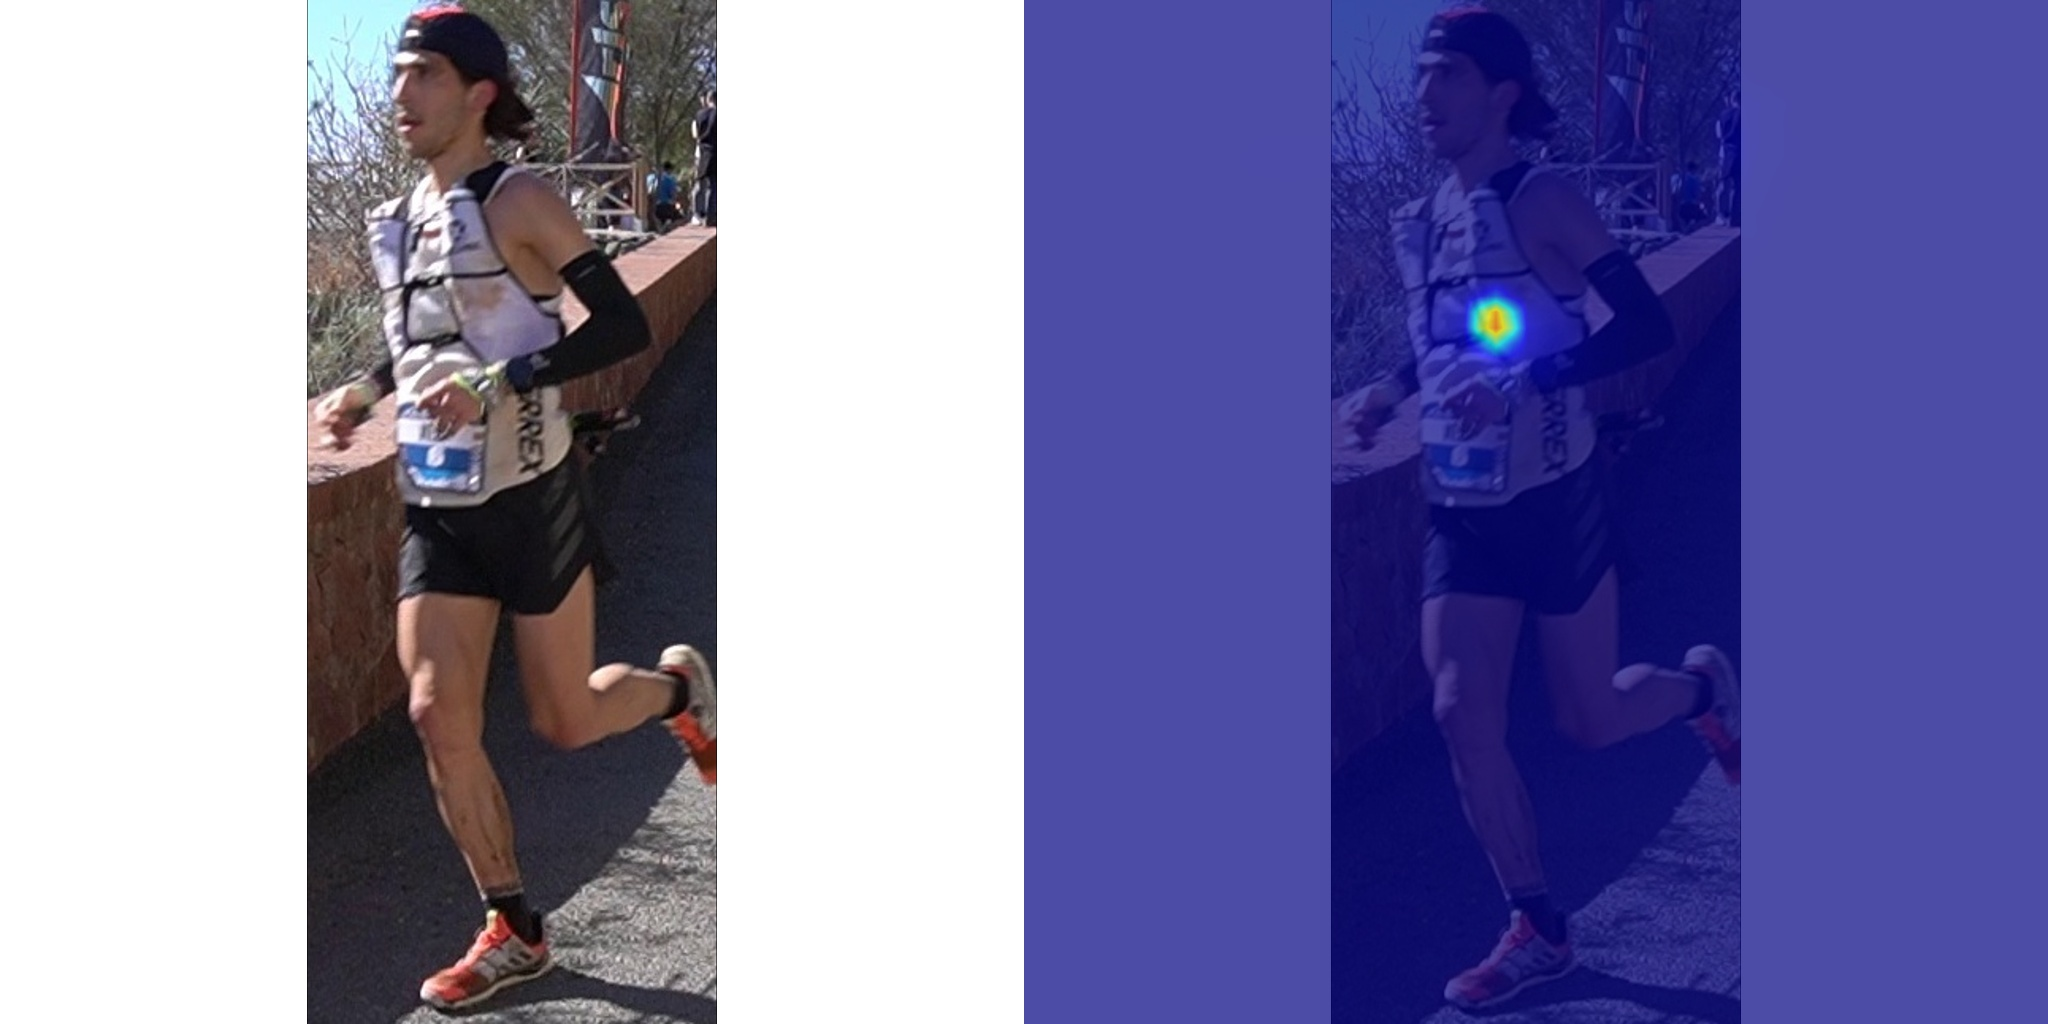

In [ ]:
# show the results
from IPython.display import Image, display
import glob
for img_path in glob.glob('/content/drive/MyDrive/TFM_ROMP/ROMP/demo/images_results/*.jpg'):
  display(Image(img_path))

In [ ]:
import numpy as np
results = np.load('/content/drive/MyDrive/TFM_ROMP/ROMP/demo/images_results/1_Ayagaures_frame_11_22_50_000.npz',allow_pickle=True)['results'][()]
for key, value in results[0].items():
  print(key,value.shape)
  if key == 'j3d_smpl24':
    pass


cam (3,)
pose (72,)
betas (10,)
j3d_smpl24 (45, 3)
j3d_spin24 (24, 3)
j3d_op25 (25, 3)
verts (6890, 3)
pj2d (54, 2)
trans (3,)


In [ ]:
!CUDA_VISIBLE_DEVICES=0 python core/test.py --gpu=0 --configs_yml=configs/video.yml

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO - 2021-04-19 10:42:44,673 - acceleratesupport - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
INFO - 2021-04-19 10:42:45,062 - base - {'tab': 'hrnet_cm64_test', 'configs_yml': 'configs/video.yml', 'demo_image_folder': 'None', 'local_rank': 0, 'model_version': 1, 'multi_person': True, 'collision_aware_centermap': False, 'collision_factor': 0.2, 'kp3d_format': 'smpl24', 'eval': False, 'max_person': 64, 'input_size': 512, 'Rot_type': '6D', 'rot_dim': 6, 'centermap_conf_thresh': 0.25, 'centermap_size': 64, 'deconv_num': 0, 'model_precision': 'fp32', 'backbone': 'hrnet', 'gmodel_path': '../trained_models/ROMP_hrnet32.pkl', 'print_freq': 50, 'fine_tune': True, 'gpu': '0', 'batch_size': 64, 'val_batch_size': 1, 'nw': 4, 'calc_PVE_error': False, 'dataset_rootdir': '/content/dataset/', 'high_resolution': True, 'save_best_folder': '/content/checkpoints/'

In [ ]:
# Play the generated video
from IPython.display import HTML
from base64 import b64encode

def display_video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video width=500 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

display_video('/content/ROMP/demo/videos/sample_video_results.mp4')

In [ ]:
# make mp4 video using the generated frame results.
import os
import cv2
import glob
import numpy as np

shape = [1024,1024]
root_dir = '/content/ROMP/demo/videos/'
out_dir = '/content/ROMP/demo/'
fold_name = 'Messi_1'
def grub_imges_demo(fold_name):
    imgs_path_demo = os.path.join(root_dir,'{}_results'.format(fold_name))
    imgs = glob.glob(os.path.join(imgs_path_demo, '{}-image*'.format(fold_name)))
    orders = []
    for img in imgs:
        orders.append(int(os.path.basename(img).replace('{}-image'.format(fold_name),'').replace('.jpg','')))
    orders = np.array(orders)
    sorted_orders = orders[np.argsort(orders)]
    imgs_sorted = []
    for idx in sorted_orders:
        imgs_sorted.append(os.path.join(imgs_path_demo, '{}-image{}.jpg'.format(fold_name,idx)))
    return imgs_sorted
def make_mp4_demo(images,name):
    num = len(images)
    print(name, 'length', num)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_movie = cv2.VideoWriter(name+'.mp4', fourcc, 30, (shape[0], shape[1]))
    for i in range(num):
        if i%100==0:
            print('Writing frame: ',i,'/',num)
        frame = cv2.imread(images[i])
        output_movie.write(frame)
imgs = grub_imges_demo(fold_name)
make_mp4_demo(imgs,os.path.join(out_dir,fold_name+'results'))
display_video('/content/ROMP/demo/videos/sample_video2_results.mp4')

In [ ]:
# If the upper one failed, please try this slow one.
from google.colab.patches import cv2_imshow
import cv2
cap = cv2.VideoCapture('/content/ROMP/demo/videos/sample_video_results.mp4')
while cap.isOpened():
    ret, image = cap.read()
    if not ret:
      break
    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow
    cv2.waitKey(1) & 0xff
cv2.destroyAllWindows()
cap.release()

Run the code on CPU

In [ ]:
!CUDA_VISIBLE_DEVICES=-1 python core/test.py --gpu=-1 --configs_yml=configs/single_image.yml

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
INFO - 2021-04-19 10:44:54,125 - acceleratesupport - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
INFO - 2021-04-19 10:44:54,551 - base - {'tab': 'hrnet_cm64_single_image_test', 'configs_yml': 'configs/single_image.yml', 'demo_image_folder': '/path/to/image_folder', 'local_rank': 0, 'model_version': 1, 'multi_person': True, 'collision_aware_centermap': False, 'collision_factor': 0.2, 'kp3d_format': 'smpl24', 'eval': False, 'max_person': 64, 'input_size': 512, 'Rot_type': '6D', 'rot_dim': 6, 'centermap_conf_thresh': 0.25, 'centermap_size': 64, 'deconv_num': 0, 'model_precision': 'fp32', 'backbone': 'hrnet', 'gmodel_path': '../trained_models/ROMP_hrnet32.pkl', 'print_freq': 50, 'fine_tune': True, 'gpu': '-1', 'batch_size': 64, 'val_batch_size': 1, 'nw': 4, 'calc_PVE_error': False, 'dataset_rootdir': '/content/dataset/', 'high_resolution': True, 'save

In [ ]:
!pip install chumpy

In [ ]:
import numpy as np
import pickle
import chumpy


class SMPLModel():
    def __init__(self, model_path):
        """
        SMPL model.
    
        Parameter:
        ---------
        model_path: Path to the SMPL model parameters, pre-processed by
        `preprocess.py`.
    
        """
        with open(model_path, 'rb') as f:
            params = pickle.load(f, encoding='latin1')

            self.J_regressor = params['J_regressor']
            self.weights = np.asarray(params['weights'])
            self.posedirs = np.asarray(params['posedirs'])
            self.v_template = np.asarray(params['v_template'])
            self.shapedirs = np.asarray(params['shapedirs'])
            self.faces = np.asarray(params['f'])
            self.kintree_table = np.asarray(params['kintree_table'])

        id_to_col = {
            self.kintree_table[1, i]: i for i in range(self.kintree_table.shape[1])
        }
        self.parent = {
            i: id_to_col[self.kintree_table[0, i]]
            for i in range(1, self.kintree_table.shape[1])
        }

        self.pose_shape = [24, 3]
        self.beta_shape = [10]
        self.trans_shape = [3]

        self.pose = np.zeros(self.pose_shape)
        self.beta = np.zeros(self.beta_shape)
        self.trans = np.zeros(self.trans_shape)

        self.verts = None
        self.J = None
        self.R = None
        self.G = None

        self.update()

    def set_params(self, pose=None, beta=None, trans=None):
        """
        Set pose, shape, and/or translation parameters of SMPL model. Verices of the
        model will be updated and returned.
    
        Prameters:
        ---------
        pose: Also known as 'theta', a [24,3] matrix indicating child joint rotation
        relative to parent joint. For root joint it's global orientation.
        Represented in a axis-angle format.
    
        beta: Parameter for model shape. A vector of shape [10]. Coefficients for
        PCA component. Only 10 components were released by MPI.
    
        trans: Global translation of shape [3].
    
        Return:
        ------
        Updated vertices.
    
        """
        if pose is not None:
            self.pose = pose
        if beta is not None:
            self.beta = beta
        if trans is not None:
            self.trans = trans
        self.update()
        return self.verts

    def update(self):
        """
        Called automatically when parameters are updated.
    
        """
        # how beta affect body shape
        v_shaped = self.shapedirs.dot(self.beta) + self.v_template
        # joints location
        self.J = self.J_regressor.dot(v_shaped)
        pose_cube = self.pose.reshape((-1, 1, 3))
        # rotation matrix for each joint
        self.R = self.rodrigues(pose_cube)
        I_cube = np.broadcast_to(
            np.expand_dims(np.eye(3), axis=0),
            (self.R.shape[0] - 1, 3, 3)
        )
        lrotmin = (self.R[1:] - I_cube).ravel()
        # how pose affect body shape in zero pose
        v_posed = v_shaped + self.posedirs.dot(lrotmin)
        # world transformation of each joint
        G = np.empty((self.kintree_table.shape[1], 4, 4))
        G[0] = self.with_zeros(np.hstack((self.R[0], self.J[0, :].reshape([3, 1]))))
        for i in range(1, self.kintree_table.shape[1]):
            G[i] = G[self.parent[i]].dot(
                self.with_zeros(
                    np.hstack(
                        [self.R[i], ((self.J[i, :] - self.J[self.parent[i], :]).reshape([3, 1]))]
                    )
                )
            )
        # remove the transformation due to the rest pose
        G = G - self.pack(
            np.matmul(
                G,
                np.hstack([self.J, np.zeros([24, 1])]).reshape([24, 4, 1])
            )
        )
        # transformation of each vertex
        T = np.tensordot(self.weights, G, axes=[[1], [0]])
        rest_shape_h = np.hstack((v_posed, np.ones([v_posed.shape[0], 1])))
        v = np.matmul(T, rest_shape_h.reshape([-1, 4, 1])).reshape([-1, 4])[:, :3]
        self.verts = v + self.trans.reshape([1, 3])
        self.G = G

    def rodrigues(self, r):
        """
        Rodrigues' rotation formula that turns axis-angle vector into rotation
        matrix in a batch-ed manner.
    
        Parameter:
        ----------
        r: Axis-angle rotation vector of shape [batch_size, 1, 3].
    
        Return:
        -------
        Rotation matrix of shape [batch_size, 3, 3].
    
        """
        theta = np.linalg.norm(r, axis=(1, 2), keepdims=True)
        # avoid zero divide
        theta = np.maximum(theta, np.finfo(np.float64).tiny)
        r_hat = r / theta
        cos = np.cos(theta)
        z_stick = np.zeros(theta.shape[0])
        m = np.dstack([
            z_stick, -r_hat[:, 0, 2], r_hat[:, 0, 1],
            r_hat[:, 0, 2], z_stick, -r_hat[:, 0, 0],
            -r_hat[:, 0, 1], r_hat[:, 0, 0], z_stick]
        ).reshape([-1, 3, 3])
        i_cube = np.broadcast_to(
            np.expand_dims(np.eye(3), axis=0),
            [theta.shape[0], 3, 3]
        )
        A = np.transpose(r_hat, axes=[0, 2, 1])
        B = r_hat
        dot = np.matmul(A, B)
        R = cos * i_cube + (1 - cos) * dot + np.sin(theta) * m
        return R

    def with_zeros(self, x):
        """
        Append a [0, 0, 0, 1] vector to a [3, 4] matrix.
    
        Parameter:
        ---------
        x: Matrix to be appended.
    
        Return:
        ------
        Matrix after appending of shape [4,4]
    
        """
        return np.vstack((x, np.array([[0.0, 0.0, 0.0, 1.0]])))

    def pack(self, x):
        """
        Append zero matrices of shape [4, 3] to vectors of [4, 1] shape in a batched
        manner.
    
        Parameter:
        ----------
        x: Matrices to be appended of shape [batch_size, 4, 1]
    
        Return:
        ------
        Matrix of shape [batch_size, 4, 4] after appending.
    
        """
        return np.dstack((np.zeros((x.shape[0], 4, 3)), x))

    def save_to_obj(self, path):
        """
        Save the SMPL model into .obj file.
    
        Parameter:
        ---------
        path: Path to save.
    
        """
        with open(path, 'w') as fp:
            for v in self.verts:
                fp.write('v %f %f %f\n' % (v[0], v[1], v[2]))
            for f in self.faces + 1:
                fp.write('f %d %d %d\n' % (f[0], f[1], f[2]))

In [ ]:
smpl = SMPLModel('/content/drive/MyDrive/TFM_ROMP/ROMP/demo/images_results/1_Ayagaures_frame_11_22_50_000.smlp')
trans = np.zeros(smpl.trans_shape)
beta = np.zeros(smpl.beta_shape)
pose = np.zeros(smpl.pose_shape)
vert = smpl.set_params(beta=beta, pose=pose, trans=trans)